# **Import the Dataset**

In [1]:
import pandas as pd
df=pd.read_csv("https://raw.githubusercontent.com/MaramShriem/-Marketing-Dataset/main/bank-full.csv",sep=';')
df.to_csv(r'TDMaketing.csv', index = False)#to save the dataset as CSV

# **EDA**

**Dataset Description**

In [ ]:
df.describe(include='all')

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
count,45211.000000,45211,45211,45211,45211,45211.000000,45211,45211,45211,45211.000000,45211,45211.000000,45211.000000,45211.000000,45211.000000,45211,45211
unique,NaN,12,3,4,2,NaN,2,2,3,NaN,12,NaN,NaN,NaN,NaN,4,2
top,NaN,blue-collar,married,secondary,no,NaN,yes,no,cellular,NaN,may,NaN,NaN,NaN,NaN,unknown,no
freq,NaN,9732,27214,23202,44396,NaN,25130,37967,29285,NaN,13766,NaN,NaN,NaN,NaN,36959,39922
mean,40.936210,NaN,NaN,NaN,NaN,1362.272058,NaN,NaN,NaN,15.806419,NaN,258.163080,2.763841,40.197828,0.580323,NaN,NaN
std,10.618762,NaN,NaN,NaN,NaN,3044.765829,NaN,NaN,NaN,8.322476,NaN,257.527812,3.098021,100.128746,2.303441,NaN,NaN
min,18.000000,NaN,NaN,NaN,NaN,-8019.000000,NaN,NaN,NaN,1.000000,NaN,0.000000,1.000000,-1.000000,0.000000,NaN,NaN
25%,33.000000,NaN,NaN,NaN,NaN,72.000000,NaN,NaN,NaN,8.000000,NaN,103.000000,1.000000,-1.000000,0.000000,NaN,NaN
50%,39.000000,NaN,NaN,NaN,NaN,448.000000,NaN,NaN,NaN,16.000000,NaN,180.000000,2.000000,-1.000000,0.000000,NaN,NaN
75%,48.000000,NaN,NaN,NaN,NaN,1428.000000,NaN,NaN,NaN,21.000000,NaN,319.000000,3.000000,-1.000000,0.000000,NaN,NaN


In [ ]:
df.shape[1]

17

In [ ]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


**Check the datatypes of the attributes**

In [ ]:
print(df.dtypes)

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object


**Checking the missing values**

In [ ]:
df.isnull().sum()
#the answer is No

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

**Check if the data is balanced or Imbalanced**

In [ ]:
x=df.drop(["y"],axis=1)
y=df["y"]
print(y.value_counts())

no     39922
yes     5289
Name: y, dtype: int64


<AxesSubplot: ylabel='y'>

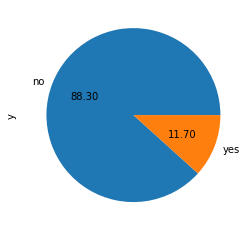

In [ ]:
y.value_counts().plot.pie(autopct="%0.2f")
#we have only 11.7% of the yes class in the dataset; that means the data in Imbalanced.

**Plot the correlation between numerical variables**

In [ ]:
df['y'].replace({'no':0, 'yes':1}, inplace=True)
df.corr()

,age,balance,day,duration,campaign,pdays,previous,y
age,1.000000,0.097783,-0.009120,-0.004648,0.004760,-0.023758,0.001288,0.025155
balance,0.097783,1.000000,0.004503,0.021560,-0.014578,0.003435,0.016674,0.052838
day,-0.009120,0.004503,1.000000,-0.030206,0.162490,-0.093044,-0.051710,-0.028348
duration,-0.004648,0.021560,-0.030206,1.000000,-0.084570,-0.001565,0.001203,0.394521
campaign,0.004760,-0.014578,0.162490,-0.084570,1.000000,-0.088628,-0.032855,-0.073172
pdays,-0.023758,0.003435,-0.093044,-0.001565,-0.088628,1.000000,0.454820,0.103621
previous,0.001288,0.016674,-0.051710,0.001203,-0.032855,0.454820,1.000000,0.093236
y,0.025155,0.052838,-0.028348,0.394521,-0.073172,0.103621,0.093236,1.000000


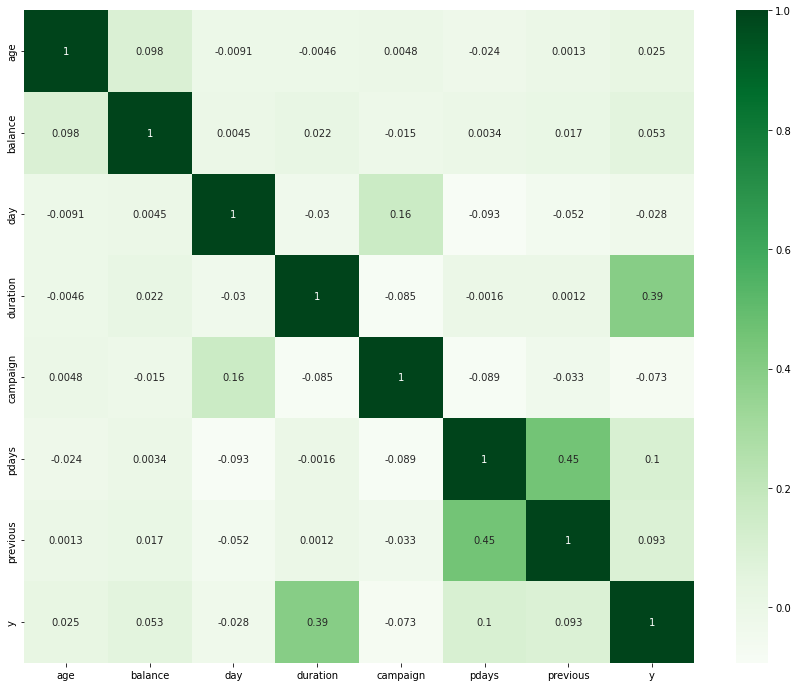

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize = (15, 12))
cor = df.corr()
sns.heatmap(cor, annot = True, cmap = plt.cm.Greens)
plt.show()

**Histograms for numerical variables**

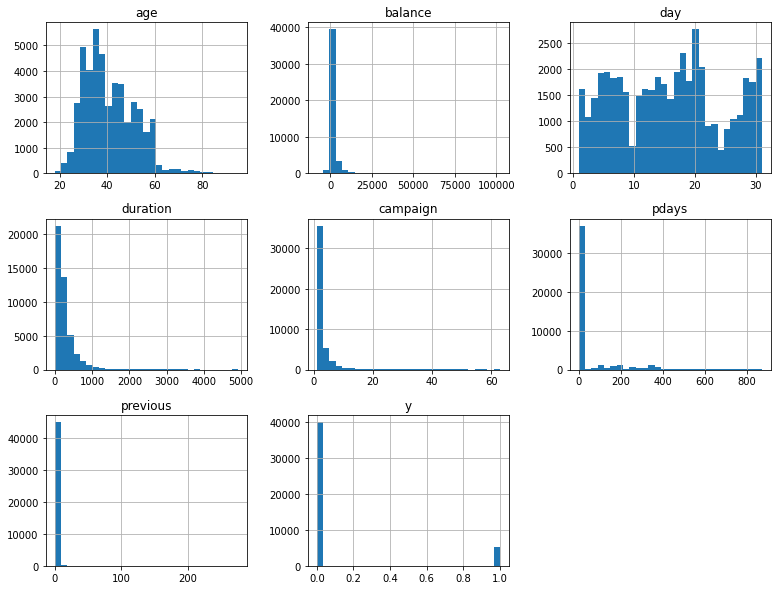

In [ ]:
axList = df.hist(bins=29,figsize = (13, 10))
plt.savefig("Hist.png")

**Correlation for categorical data**

In [ ]:
!pip install dython

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
! pip install -U Imbalanced-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


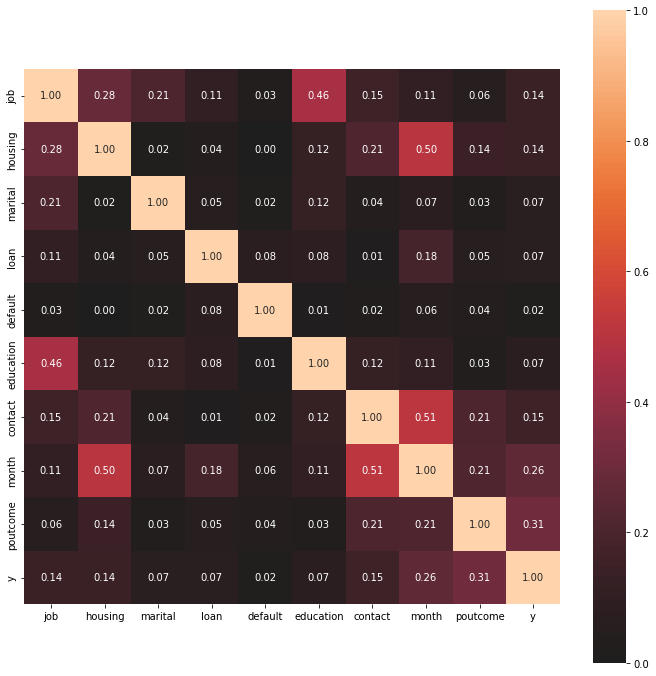

In [ ]:
!pip install matplotlib>=3.4.3
!pip install dython
import pandas as pd
df=pd.read_csv("https://raw.githubusercontent.com/MaramShriem/-Marketing-Dataset/main/bank-full.csv",sep=';')
df.to_csv(r'TDMaketing.csv', index = False)

from dython.nominal import associations
selected_column= df[["job","housing","marital","loan","default","education","contact","month","poutcome","y"]]
categorical_df = selected_column.copy()
categorical_correlation= associations(categorical_df, filename= 'categorical_correlation.png', figsize=(12,12))

# **Data Preprocessing:**


In [2]:
dff=df.copy()

In [3]:
#Normalize the numeric variables: this is step is important specially when we want to build the logistic regression model 
#as the numeric variables are not normalliy distriputed and the LG requaired a normalized dataset
from sklearn.preprocessing import MinMaxScaler
from sklearn import preprocessing

for column in dff.columns:
    if dff[column].dtype in ['int64', 'float64']:  
        X = dff[column].array.reshape(-1,1)     
        #build the scaler model
        scaler = MinMaxScaler()
        
        # fit using the whole dataset
        scaler.fit(X)

        dff[column]=scaler.transform(dff[column].array.reshape(-1, 1)) # Apply to to the dataset
display(dff)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,0.519481,management,married,tertiary,no,0.092259,yes,no,unknown,0.133333,may,0.053070,0.000000,0.000000,0.000000,unknown,no
1,0.337662,technician,single,secondary,no,0.073067,yes,no,unknown,0.133333,may,0.030704,0.000000,0.000000,0.000000,unknown,no
2,0.194805,entrepreneur,married,secondary,no,0.072822,yes,yes,unknown,0.133333,may,0.015453,0.000000,0.000000,0.000000,unknown,no
3,0.376623,blue-collar,married,unknown,no,0.086476,yes,no,unknown,0.133333,may,0.018707,0.000000,0.000000,0.000000,unknown,no
4,0.194805,unknown,single,unknown,no,0.072812,no,no,unknown,0.133333,may,0.040260,0.000000,0.000000,0.000000,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,0.428571,technician,married,tertiary,no,0.080293,no,no,cellular,0.533333,nov,0.198658,0.032258,0.000000,0.000000,unknown,yes
45207,0.688312,retired,divorced,primary,no,0.088501,no,no,cellular,0.533333,nov,0.092721,0.016129,0.000000,0.000000,unknown,yes
45208,0.701299,retired,married,secondary,no,0.124689,no,no,cellular,0.533333,nov,0.229158,0.064516,0.212156,0.010909,success,yes
45209,0.506494,blue-collar,married,secondary,no,0.078868,no,no,telephone,0.533333,nov,0.103294,0.048387,0.000000,0.000000,unknown,no


In [4]:
#from sklearn import preprocessing
#d = preprocessing.normalize(dff.select_dtypes('int64'))
#names=dff.select_dtypes('int64').columns
#scaled_df = pd.DataFrame(d, columns=names)
#scaled_df

**label encoder for variable: y**

In [5]:
le = preprocessing.LabelEncoder()
le.fit(dff["y"])
list(le.classes_)
dff["y"]=le.transform(dff["y"])
# we converted the dpendent varaiable to be 0,1 where 0 is for "no" and 1 is for "yes" which is the desired output

**Get dummies**

In [6]:
#get dummies for the rest of categorical variables:
df_cat = dff.select_dtypes('object')
dff = pd.get_dummies(dff, df_cat.columns, drop_first = False)
dff.info()
# we got 52 coulmns (variables)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 52 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  45211 non-null  float64
 1   balance              45211 non-null  float64
 2   day                  45211 non-null  float64
 3   duration             45211 non-null  float64
 4   campaign             45211 non-null  float64
 5   pdays                45211 non-null  float64
 6   previous             45211 non-null  float64
 7   y                    45211 non-null  int64  
 8   job_admin.           45211 non-null  uint8  
 9   job_blue-collar      45211 non-null  uint8  
 10  job_entrepreneur     45211 non-null  uint8  
 11  job_housemaid        45211 non-null  uint8  
 12  job_management       45211 non-null  uint8  
 13  job_retired          45211 non-null  uint8  
 14  job_self-employed    45211 non-null  uint8  
 15  job_services         45211 non-null 

# **Split the Data**


In [12]:
#The split technique that have been chosen  is  holdout split (Test set is 33.3% and Training set is 66.7%) 
#as this is the most popular way to use, only needs to be run once so has lower computational costs. 
#Many of the researchers on similar topic used this technique and ratio
#Since this method might lead to an overfitting after oversampling technique or underfitting after undersampling technique.
#The performance will be checked again and average will be taken, after appling oversampling/undersampling and cross validation 

import numpy as np
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(dff.drop(["y"],axis="columns"),dff.y,shuffle=True, random_state=5,test_size=.333)

In [13]:
len(x_train)#number or rows in train set

30155

In [14]:
len(x_test)#number or rows in test set

15056

*Convert the y variable in the train and test set to flattened array(1D array with all the input-array elements and with the same type as it).*

In [15]:
y_train = y_train.ravel()
y_test = y_test.ravel()

# **Modles Building**

The chosen models are Random Forest, Decision Tree, and Logistic Regression.
The reason behind choosing these algorithms is that they are the most popular models for a binary classification problem. As what mentioned in the literature review these models were the most common models to solve a binary classification problem on dataset similar/exact to the dataset of this project.

Random forest is the candidate to be the best model perfomance as it was the best in many reviewed related articles. 

In addition to that, many studies emphasied that ensemble models perfoms better than other models. 


## **Imbalanced Data**

1. In this stage the models have been built on the Imbalanced dataset, in order to compare the performance results before and after balancing the data.
later in this script, an application on over sampling (SMOTE) and undersamping techniques ( Random Under Sampling) will be applied and compared.
2. The models have been tuned based on some parameters:
A. Random Forest tuned parameters are: Max depth and the n_estimators (number of trees) 
B. Decision Tree tuned parameters are: Max depth 
3. We focused on optimizing F1-Score metric as it was the smallest value in the confusion matrix in the first run time. 
please note that the tuning process also have been applied to optimize the Accuracy and the AUROC but it didnt improve as expected also it led to a decrease in the MCC while improving the F1-score led to an improvement in MCC.



### **Random Forest Hyperparameter Tuning (based on max depth, number of trees and F1-Score)**

In [ ]:
'''Grid search (GridSearchCV) is arguably the most basic hyperparameter tuning method. With this technique, 
we simply build a model for each possible combination of all of the hyperparameter values provided, 
evaluating each model, and selecting the architecture which produces the best results.

For more information about GridSearchCV: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html'''

'Grid search (GridSearchCV) is arguably the most basic hyperparameter tuning method. With this technique, \nwe simply build a model for each possible combination of all of the hyperparameter values provided, \nevaluating each model, and selecting the architecture which produces the best results.\n\nFor more information about GridSearchCV: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html'

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(random_state=1)

In [ ]:
#This step has been run repeatedly on different ranges of the model parameters in order to tune them on the right values.
import numpy as np
from sklearn.model_selection import GridSearchCV

max_depth_range=np.arange(25,30,1)
n_estimators_range=np.arange(130,180,30)
param_grid=dict(max_depth=max_depth_range,n_estimators=n_estimators_range)
Urfgrid=GridSearchCV(estimator=rf,param_grid=param_grid,scoring="f1",cv=3,n_jobs=-1)

In [ ]:
Urfgrid.fit(x_train,y_train)

GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=1), n_jobs=-1,
             param_grid={'max_depth': array([25, 26, 27, 28, 29]),
                         'n_estimators': array([130, 160])},
             scoring='f1')

In [ ]:
print("the best parameters are %s with a score of %0.2f" % (Urfgrid.best_params_,Urfgrid.best_score_))#Mean cross-validated score of the best_estimator
#the score is the average of all cv folds for a single combination of the parameters you specify in the tuned_params

the best parameters are {'max_depth': 29, 'n_estimators': 130} with a score of 0.47


In [ ]:
#data frame of grid search parameters and their F1 Scores scores
import pandas as pd

grid_results = pd.concat([pd.DataFrame(Urfgrid.cv_results_["params"]),
                          pd.DataFrame(Urfgrid.cv_results_["mean_test_score"], columns=["f1"])],axis=1)
grid_results.head()

#preparing data for making  contour plots
grid_contour = grid_results.groupby(['max_depth','n_estimators']).mean()
grid_contour

#pivot data:
grid_reset=grid_contour.reset_index()
grid_reset.columns=["max_depth","n_estimator","f1"]
grid_pivot=grid_reset.pivot("max_depth","n_estimator")

#assigning the pivoted data into the respective x,y, and z variables
x=grid_pivot.columns.levels[1].values
y=grid_pivot.index.values
z=grid_pivot.values

#2D contour plot
import plotly.graph_objects as go

# X and Y axes labels
layout = go.Layout(
            xaxis=go.layout.XAxis(
              title=go.layout.xaxis.Title(
              text='n_estimators')
             ),
             yaxis=go.layout.YAxis(
              title=go.layout.yaxis.Title(
              text='max_depth') 
            ) )

fig = go.Figure(data = [go.Contour(z=z, x=x, y=y)], layout=layout )

fig.update_layout(title='Imbalanced- Random Forest Hyperparameter tuning', autosize=False,
                  width=500, height=500,
                  margin=dict(l=65, r=50, b=65, t=90))

fig.show()

### **Decision Tree Hyperparameter Tuning (based on max depth and F1-Score)**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier(random_state=1)

In [ ]:
#This step has been run repeatedly on different ranges of the model parameters in order to tune them on the right values.
import numpy as np
from sklearn.model_selection import GridSearchCV

max_depth_range=np.arange(1,10,1)
param_grid=dict(max_depth=max_depth_range)
Udtgrid=GridSearchCV(estimator=dt,param_grid=param_grid,scoring="f1",cv=10,n_jobs=-1)

In [ ]:
Udtgrid.fit(x_train,y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=1), n_jobs=-1,
             param_grid={'max_depth': array([1, 2, 3, 4, 5, 6, 7, 8, 9])},
             scoring='f1')

In [ ]:
print("the best parameters are %s with a score of %0.2f" % (Udtgrid.best_params_,Udtgrid.best_score_))#Mean cross-validated score of the best_estimator
#the score is the average of all cv folds for a single combination of the parameters you specify in the tuned_params

the best parameters are {'max_depth': 9} with a score of 0.48


### **Logistic Regression Hyperparameter Tuning (based on Max Iteration, Solver and F1-Score)**


In [ ]:
from sklearn.linear_model import LogisticRegression
lgr=LogisticRegression(random_state=1,n_jobs=-1)

In [ ]:
#This step has been run repeatedly on different ranges of the model parameters in order to tune them on the right values.
import numpy as np
from sklearn.model_selection import GridSearchCV

max_iter=np.arange(100,1000,100)

param_grid=dict(max_iter=max_iter,solver=['liblinear', 'lbfgs'])
Ulgrgrid=GridSearchCV(estimator=lgr,param_grid=param_grid,scoring="f1",cv=3,n_jobs=-1)
# -1 means using all processors. This means that the n_jobs parameter can be used to distribute and exploit all the CPUs available in the local computer

In [ ]:
Ulgrgrid.fit(x_train,y_train)

GridSearchCV(cv=3, estimator=LogisticRegression(n_jobs=-1, random_state=1),
             n_jobs=-1,
             param_grid={'max_iter': array([100, 200, 300, 400, 500, 600, 700, 800, 900]),
                         'solver': ['liblinear', 'lbfgs']},
             scoring='f1')

In [ ]:
print("the best parameters are %s with a score of %0.2f" % (Ulgrgrid.best_params_,Ulgrgrid.best_score_))#Mean cross-validated score of the best_estimator
#the score is the average of all cv folds for a single combination of the parameters you specify in the tuned_params

the best parameters are {'max_iter': 100, 'solver': 'lbfgs'} with a score of 0.42


### **1. Imbalanced-Train the model and calculate the run time of training the model**


In [19]:
#From the above we can conclude that the best parameters are:

#Random Forest:
U_RF_max_depth= 29 #Is the max depth for each tree in the random forest
U_RF_n_estimators= 130 #Is the number of trees in the random forest

# Decision Tree:
U_DT_max_depth=9  #Is the max depth for the tree

#Logistic Regression:
U_lgr_max_iter=100 # max_iter is the maximum number of iterations taken for the solvers to converge.

U_lgr_solver="lbfgs" #Solver: is the algorithm to use in the optimization problem

#These values may differ slightly on each run for tunning.
#Please note that I have saved the parameters values (after tuning) of each model in the above variables in order to make the run time shorter everytime we need to train the model.

In [20]:
#Random Forest Training 
np.random.seed(1)
import time
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=U_RF_n_estimators, max_depth= U_RF_max_depth,random_state=1)

startrf=time.time()
rf.fit(x_train,y_train)
endrf=time.time()

#Decision Tree Training
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier(max_depth=U_DT_max_depth,random_state=1)

startdt=time.time()
dt.fit(x_train,y_train)
enddt=time.time()

#Linear Regression Training
from sklearn.linear_model import LogisticRegression
lgr=LogisticRegression(max_iter=U_lgr_max_iter, solver=U_lgr_solver,n_jobs=-1)
# -1 means using all processors. This means that the n_jobs parameter can be used to distribute and exploit all the CPUs available in the local computer
startlgr=time.time()
lgr.fit(x_train,y_train)
endlgr=time.time()

print("RF Training Run Time [s]:",endrf-startrf)
print("DT Training Run Time [s]:",enddt-startdt)
print("LGR Training Run Time [s]:",endlgr-startlgr)

# The results shows the the faster model is the Decision tree, Logistic regression, and the Random forest respectively.
# Random Forest model was the slowest one( which is expected as it is an ensemble model)

RF Training Run Time [s]: 4.76113748550415
DT Training Run Time [s]: 0.1609477996826172
LGR Training Run Time [s]: 0.8442420959472656


### **2. Imbalanced- Run Time for prediction**






In [21]:
# The run time to predict the test set in each model is:
np.random.seed(2)
#Random Forest
startrf=time.time()
y_predictedrf=rf.predict(x_test)
endrf=time.time()

#Decision Tree
startdt=time.time()
y_predicteddt=dt.predict(x_test)
enddt=time.time()

#Logistic Regression
startlgr=time.time()
y_predictedlgr=lgr.predict(x_test)
endlgr=time.time()

print("RF Run Time to Predict the testset [s]:",endrf-startrf)
print("DT Run Time to Predict the testset [s]:",enddt-startdt)
print("LGR Run Time to Predict the testset [s]:",endlgr-startlgr)

# The results shows the the faster model is the Logistic regression,Decision tree, and the Random forest respectively.
# Random Forest model was the slowest one( which is expected as it is an ensemble model)

RF Run Time to Predict the testset [s]: 0.3759195804595947
DT Run Time to Predict the testset [s]: 0.003934383392333984
LGR Run Time to Predict the testset [s]: 0.0027048587799072266


###**3. Imbalanced- Confusion Matrix**

Random Forest 
               precision    recall  f1-score   support

           0       0.92      0.97      0.95     13276
           1       0.67      0.39      0.50      1780

    accuracy                           0.91     15056
   macro avg       0.80      0.68      0.72     15056
weighted avg       0.89      0.91      0.89     15056

Decision Tree
               precision    recall  f1-score   support

           0       0.92      0.97      0.94     13276
           1       0.62      0.39      0.48      1780

    accuracy                           0.90     15056
   macro avg       0.77      0.68      0.71     15056
weighted avg       0.89      0.90      0.89     15056

Logistic Regression
               precision    recall  f1-score   support

           0       0.92      0.98      0.95     13276
           1       0.67      0.33      0.44      1780

    accuracy                           0.90     15056
   macro avg       0.79      0.66      0.70     15056
weighted avg       0.8

Text(0, -0.75, 'Logistic Regression Performance')

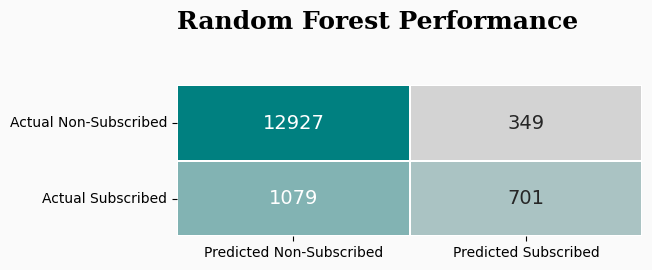

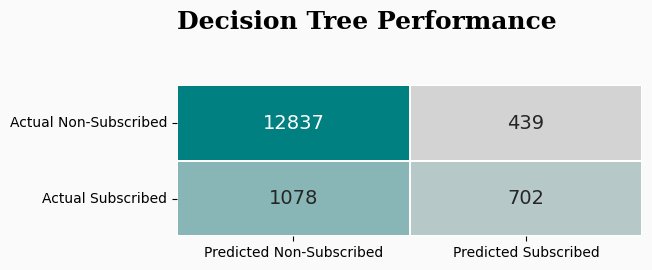

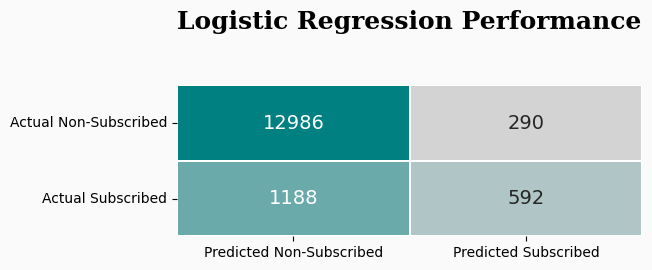

In [22]:
from matplotlib import pyplot as plt
from sklearn.metrics import recall_score, make_scorer, confusion_matrix, classification_report,ConfusionMatrixDisplay
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
class Colors:
    Gray = "#5d5d5d"
    LightGray = "#fafafa"
    Black = "#000000"
    White = "#FFFFFF"
    Teal = "#008080"
    Aquamarine = "#76c8c8"
    Blue = "#2596be"
    LightCyan = "#badbdb"
    WhiteSmoke = "#dedad2"
    Cream = "#e4bcad"
    PeachPuff = "#df979e"
    HotPink = "#d7658b"
    DeepPink = "#c80064"
    LightSeaGreen = "#20B2AA"
    DarkGray = "#464144"
    
#Confusion Matrix of Random Forest
fig = plt.figure(figsize=(6, 2), dpi=100, facecolor=Colors.LightGray)
gs = fig.add_gridspec(1, 1)
gs.update(wspace=0.35, hspace=0.27)
ax0 = fig.add_subplot(gs[0:1, 0:1])


cmrf = confusion_matrix(y_test,y_predictedrf)
colors = ['lightgray',Colors.Teal,Colors.Teal,Colors.Teal,Colors.Teal,Colors.Teal,Colors.Teal,Colors.Teal]
colormap = matplotlib.colors.LinearSegmentedColormap.from_list("", colors)
sns.heatmap(cmrf, cmap=colormap,annot=True,fmt="d", linewidths=1,cbar=False,
            yticklabels=['Actual Non-Subscribed','Actual Subscribed'],
            xticklabels=['Predicted Non-Subscribed','Predicted Subscribed'],annot_kws={"fontsize":14})
print("Random Forest \n",classification_report(y_test, y_predictedrf))
ax0.text(0,-0.75,'Random Forest Performance',fontsize=18,fontweight='bold',fontfamily='serif')

#Confusion Matrix of Decision Tree
fig = plt.figure(figsize=(6, 2), dpi=100, facecolor=Colors.LightGray)
gs = fig.add_gridspec(1, 1)
gs.update(wspace=0.35, hspace=0.27)
ax0 = fig.add_subplot(gs[0:1, 0:1])

cmdt = confusion_matrix(y_test,y_predicteddt)
colors = ['lightgray',Colors.Teal,Colors.Teal,Colors.Teal,Colors.Teal,Colors.Teal,Colors.Teal,Colors.Teal]
colormap = matplotlib.colors.LinearSegmentedColormap.from_list("", colors)
sns.heatmap(cmdt, cmap=colormap,annot=True,fmt="d", linewidths=1,cbar=False,
            yticklabels=['Actual Non-Subscribed','Actual Subscribed'],
            xticklabels=['Predicted Non-Subscribed','Predicted Subscribed'],annot_kws={"fontsize":14})
print("Decision Tree\n",classification_report(y_test, y_predicteddt))
ax0.text(0,-0.75,'Decision Tree Performance',fontsize=18,fontweight='bold',fontfamily='serif')

#Confusion Matrix of Logistic Regression
fig = plt.figure(figsize=(6, 2), dpi=100, facecolor=Colors.LightGray)
gs = fig.add_gridspec(1, 1)
gs.update(wspace=0.35, hspace=0.27)
ax0 = fig.add_subplot(gs[0:1, 0:1])

cmlgr = confusion_matrix(y_test,y_predictedlgr)
colors = ['lightgray',Colors.Teal,Colors.Teal,Colors.Teal,Colors.Teal,Colors.Teal,Colors.Teal,Colors.Teal]
colormap = matplotlib.colors.LinearSegmentedColormap.from_list("", colors)
sns.heatmap(cmlgr, cmap=colormap,annot=True,fmt="d", linewidths=1,cbar=False,
            yticklabels=['Actual Non-Subscribed','Actual Subscribed'],
            xticklabels=['Predicted Non-Subscribed','Predicted Subscribed'],annot_kws={"fontsize":14})
print("Logistic Regression\n",classification_report(y_test, y_predictedlgr))
ax0.text(0,-0.75,'Logistic Regression Performance',fontsize=18,fontweight='bold',fontfamily='serif')


In [23]:
#checking
tn, fp, fn, tp = cmrf.ravel()
tn, fp, fn, tp

(12927, 349, 1079, 701)

###**4. Imbalanced- Calculate the AUROC**

1. Higher is better 
2. Between 0 and 1


Random Forest: AUROC= 0.929
Decision Tree: AUROC= 0.837
Logistic Regression: AUROC= 0.907


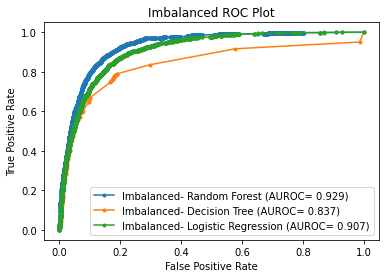

In [24]:
#to get the probabilities of the prediction for each instance in the test set
np.random.seed(1)
rf_probs= rf.predict_proba(x_test)#random forest
dt_probs= dt.predict_proba(x_test)#decision tree
lgr_probs= lgr.predict_proba(x_test)#logistic regression

#to keep the probabilities of positive outcomes 

#random forest
rf_probs=rf_probs[:,1]
rf_probs

#decision tree
dt_probs=dt_probs[:,1]
dt_probs

#logistic regression
lgr_probs=lgr_probs[:,1]
lgr_probs

#Print AUROC score
from sklearn.metrics import roc_curve, roc_auc_score
rf_auc=roc_auc_score(y_test,rf_probs)#random forest
dt_auc=roc_auc_score(y_test,dt_probs)#decision tree
lgr_auc=roc_auc_score(y_test,lgr_probs)#logistic regression

print("Random Forest: AUROC= %.3f" % (rf_auc))#random forest
print("Decision Tree: AUROC= %.3f" % (dt_auc))#decision tree
print("Logistic Regression: AUROC= %.3f" % (lgr_auc))#logistic regression

#Calculate and plot ROC curve
'''roc_curve() returns three arrays, first one is false positive rate(fpr), second one is true positive rate(tpr) and the third one is the threshold (_)
#for more information: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html'''
rf_fpr,rf_tpr,_=roc_curve(y_test,rf_probs)#random forest 
dt_fpr,dt_tpr,_=roc_curve(y_test,dt_probs)#decision tree
lgr_fpr,lgr_tpr,_=roc_curve(y_test,lgr_probs)#logistic regression

#plot each model:
import matplotlib.pyplot as plt
plt.plot(rf_fpr,rf_tpr,marker=".",label="Imbalanced- Random Forest (AUROC= %0.3f)" % rf_auc)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

plt.plot(dt_fpr,dt_tpr,marker=".",label="Imbalanced- Decision Tree (AUROC= %0.3f)" % dt_auc)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

plt.plot(lgr_fpr,lgr_tpr,marker=".",label="Imbalanced- Logistic Regression (AUROC= %0.3f)" % lgr_auc)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

plt.title("Imbalanced ROC Plot")
plt.legend()
plt.show()

#The results show the best AUROC if for Random forest with 0.93 score followed by Logisitic regression and Decision tree respectivily.

### **5. Imbalanced- Summary (Accuracy, Recall,  specificity, AUROC, MCC, Brier_score_loss, Run_time) for the models**

In [25]:
np.random.seed(1)
from sklearn.metrics import roc_curve, roc_auc_score,accuracy_score,recall_score,matthews_corrcoef,brier_score_loss,f1_score
from sklearn import tree, linear_model,ensemble
MLA = [tree.DecisionTreeClassifier(max_depth=U_DT_max_depth,random_state=1),
       linear_model.LogisticRegression(max_iter=U_lgr_max_iter,solver=U_lgr_solver,n_jobs=-1),
       ensemble.RandomForestClassifier(n_estimators=U_RF_n_estimators, max_depth=U_RF_max_depth,random_state=1)]
import time
name = []
Accuracy = []
Specificity=[]
Sensetivity=[]
alg_auc=[]
Mcc=[]
br_s=[]
f1score=[]
T_time=[]
P_time=[]
for alg in MLA:
    name.append(alg.__class__.__name__)
    start=time.time()
    alg.fit(x_train,y_train)
    end=time.time()
    startp=time.time()
    y_predicted=alg.predict(x_test)
    endp=time.time()
    Accuracy.append(accuracy_score(y_test,y_predicted))
    Specificity.append(recall_score(y_test, y_predicted, pos_label=0))
    Sensetivity.append(recall_score(y_test, y_predicted, pos_label=1))
    Mcc.append(matthews_corrcoef(y_test, y_predicted))
    br_s.append(brier_score_loss(y_test, y_predicted))
    f1score.append(f1_score(y_test,y_predicted))
    alg_probs= alg.predict_proba(x_test)
    alg_probs=alg_probs[:,1]
    alg_auc.append(roc_auc_score(y_test,alg_probs))
    T_time.append(end-start)
    P_time.append(endp-startp)

    
comparison = pd.DataFrame({"name": name, "Accuracy": Accuracy,"Sensetivity":Sensetivity,"Specificity":Specificity,"AUC":alg_auc,"MCC":Mcc,"Brier_score":br_s,
                           "F1Score":f1score,"TrainingTime_s": T_time,"Prediction Time [s]": P_time})
display(comparison)

#From the below results we can conclude that the random forest is slightly better than other models especially 
#If we compared them by the Brior_score, Matthew’s correlation coefficient (MCC), Accuracy, and Specificity.
#MCC: Recently alot of researches prove that it is a better measurement especially for binary classification problems along with the brier score.

,name,Accuracy,Sensetivity,Specificity,AUC,MCC,Brier_score,F1Score,TrainingTime_s,Prediction Time [s]
0,DecisionTreeClassifier,0.899243,0.394382,0.966933,0.837322,0.440803,0.100757,0.480657,0.166441,0.004018
1,LogisticRegression,0.901833,0.332584,0.978156,0.907439,0.427229,0.098167,0.444778,1.523420,0.004021
2,RandomForestClassifier,0.905154,0.393820,0.973712,0.929200,0.465894,0.094846,0.495406,4.695622,0.410130


### **6. Imbalanced- Check Over/Underfitting**
Brier Score was used to evaluate the model fitting 

The reason behind using the Brier score metric is that Brier score measures the mean squared difference between the predicted probability and the actual outcome. The Brier score always takes on a value between zero and one, since this is the largest possible difference between a predicted probability (which must be between zero and one) and the actual outcome (which can take on values of only 0 and 1). It can be decomposed is the sum of refinement loss and calibration loss.
The Brier score is appropriate for binary and categorical outcomes that can be structured as true or false, but is inappropriate for ordinal variables which can take on three or more values

Brier score is actually 1-Accuracy 

"The Brier score is a strictly proper scoring function that
is equivalent to the mean squared error" (Chicco, D., Warrens, M. J., & Jurman, G. (2021)).

*The smaller the Brier score loss, the better, hence the naming with “loss”.

1.   If the performance of the model on the training set is poor that means the model is underfitting to the test data.

2.   If the performance of the model on the test set is poor that means the model is overfitting to the training data.





In [ ]:
#repeated kfold validation
from numpy import mean
from numpy import std
from sklearn.metrics import roc_curve, roc_auc_score,accuracy_score,recall_score,brier_score_loss
from sklearn import tree, linear_model,ensemble 
from sklearn.model_selection import validation_curve
from sklearn.model_selection import KFold
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_val_score
import numpy as np
np.random.seed(0)
import matplotlib.pyplot as plt
plt.style.use("ggplot")

In [ ]:
#Decision Tree
# prepare the cross-validation procedure
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
U_DT_list_training_BrierScore=[]
U_DT_list_testing_BrierScore=[]
X=dff.drop(["y"],axis="columns")
y=dff.y
for train_index,test_index in cv.split(dff):
  X_train,X_test=X.iloc[train_index,:],X.iloc[test_index,:]
  Y_train,Y_test=y.iloc[train_index],y.iloc[test_index]
  model=tree.DecisionTreeClassifier(max_depth=U_DT_max_depth,random_state=1)
  model.fit(X_train,Y_train)

  y_train_data_pred=model.predict(X_train)
  y_test_data_pred=model.predict(X_test)

  U_DT_fold_training_BrierScore=brier_score_loss(Y_train,y_train_data_pred)
  U_DT_fold_testing_BrierScore=brier_score_loss(Y_test,y_test_data_pred)

  U_DT_list_training_BrierScore.append(U_DT_fold_training_BrierScore)
  U_DT_list_testing_BrierScore.append(U_DT_fold_testing_BrierScore)

In [ ]:
print("DT_Test_BScore_Mean:", mean(U_DT_list_testing_BrierScore))
print("DT_Train_BScore_Mean:", mean(U_DT_list_training_BrierScore))

DT_Test_BScore_Mean: 0.09962907548611827
DT_Train_BScore_Mean: 0.07913020226274736


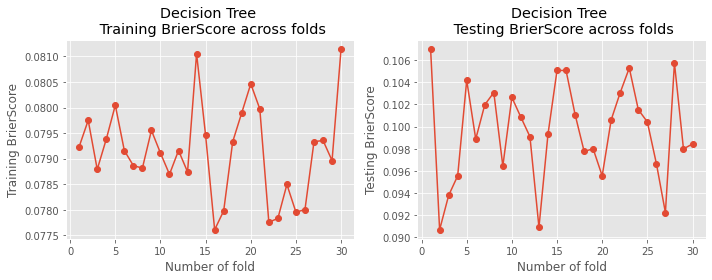

In [ ]:
#plot the BrierScore of the training phase and the BrierScore of the testing phase
plt.figure(figsize = (10, 4))
plt.subplot(1,2,1)
plt.plot(range(1,cv.get_n_splits()+1),np.array(U_DT_list_training_BrierScore).ravel(),"o-")
plt.xlabel("Number of fold")
plt.ylabel("Training BrierScore")
plt.title("Decision Tree \n Training BrierScore across folds")
plt.tight_layout()
plt.subplot(1,2,2)
plt.plot(range(1,cv.get_n_splits()+1),np.array(U_DT_list_testing_BrierScore).ravel(),"o-")
plt.xlabel("Number of fold")
plt.ylabel("Testing BrierScore")
plt.title("Decision Tree \n Testing BrierScore across folds")
plt.tight_layout()
plt.show()

#From the below graphs if we looked at the the first graph "Decision Tree -Training BrierScore across folds" we can see the the models fits really well as the BrierScore 
#is around 0.08.
#in the second graph "Decision Tree -Testing BrierScore across folds"it also fits well as the BrierScore on the test set is around 0.1. 
#That means also that we have a fitted model and stable one.

In [ ]:
#Logistic Regression
# prepare the cross-validation procedure
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
U_lgr_list_training_BrierScore=[]
U_lgr_list_testing_BrierScore=[]
X=dff.drop(["y"],axis="columns")
y=dff.y
for train_index,test_index in cv.split(dff):
  X_train,X_test=X.iloc[train_index,:],X.iloc[test_index,:]
  Y_train,Y_test=y.iloc[train_index],y.iloc[test_index]
  model=linear_model.LogisticRegression(max_iter=U_lgr_max_iter,solver= U_lgr_solver,random_state=1,n_jobs=-1)
  model.fit(X_train,Y_train)

  y_train_data_pred=(model.predict_proba(X_train))[:,1]
  y_test_data_pred= (model.predict_proba(X_test))[:,1]

  U_lgr_fold_training_BrierScore=brier_score_loss(Y_train,y_train_data_pred)
  U_lgr_fold_testing_BrierScore=brier_score_loss(Y_test,y_test_data_pred)

  U_lgr_list_training_BrierScore.append(U_lgr_fold_training_BrierScore)
  U_lgr_list_testing_BrierScore.append(U_lgr_fold_testing_BrierScore)

In [ ]:
print("LG_Test_BScore_Mean:", mean(U_lgr_list_testing_BrierScore))
print("LG_Train_BScore_Mean:", mean(U_lgr_list_training_BrierScore))

LG_Test_BScore_Mean: 0.07132303555637362
LG_Train_BScore_Mean: 0.07100383987335479


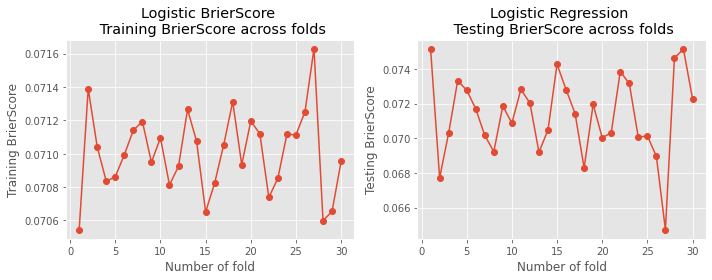

In [ ]:
#plot the BrierScore of the training phase and the BrierScore of the testing phase
plt.figure(figsize = (10, 4))
plt.subplot(1,2,1)
plt.plot(range(1,cv.get_n_splits()+1),np.array(U_lgr_list_training_BrierScore).ravel(),"o-")
plt.xlabel("Number of fold")
plt.ylabel("Training BrierScore")
plt.title("Logistic BrierScore \n Training BrierScore across folds")
plt.tight_layout()
plt.subplot(1,2,2)
plt.plot(range(1,cv.get_n_splits()+1),np.array(U_lgr_list_testing_BrierScore).ravel(),"o-")
plt.xlabel("Number of fold")
plt.ylabel("Testing BrierScore")
plt.title("Logistic Regression \n Testing BrierScore across folds")
plt.tight_layout()
plt.show()

#From the below graphs if we looked at the the first graph "Logistic Regression -Training BrierScore across folds" we can see the the models fits really well 
#as the BrierScore is stable and very small (about 0.07).
#In the second graph "Logistic Regression -Testing BrierScore across folds"it also fits well as the BrierScore on the test set is also around 0.07. 
#That means also that we have a fitted model and stable one.

In [ ]:
#Random Forest
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
U_RF_list_training_BrierScore=[]
U_RF_list_testing_BrierScore=[]
X=dff.drop(["y"],axis="columns")
y=dff.y
for train_index,test_index in cv.split(dff):
  X_train,X_test=X.iloc[train_index,:],X.iloc[test_index,:]
  Y_train,Y_test=y.iloc[train_index],y.iloc[test_index]
  model=ensemble.RandomForestClassifier(n_estimators=U_RF_n_estimators, max_depth=U_RF_max_depth,random_state=1)
  model.fit(X_train,Y_train)

  y_train_data_pred=model.predict(X_train)
  y_test_data_pred=model.predict(X_test)

  U_RF_fold_training_BrierScore=brier_score_loss(Y_train,y_train_data_pred)
  U_RF_fold_testing_BrierScore=brier_score_loss(Y_test,y_test_data_pred)

  U_RF_list_training_BrierScore.append(U_RF_fold_training_BrierScore)
  U_RF_list_testing_BrierScore.append(U_RF_fold_testing_BrierScore)

In [ ]:
print("RF_Test_BScore_Mean:", mean(U_RF_list_testing_BrierScore))
print("RF_Train_BScore_Mean:", mean(U_RF_list_training_BrierScore))

RF_Test_BScore_Mean: 0.09349489758068094
RF_Train_BScore_Mean: 0.0005267483980666975


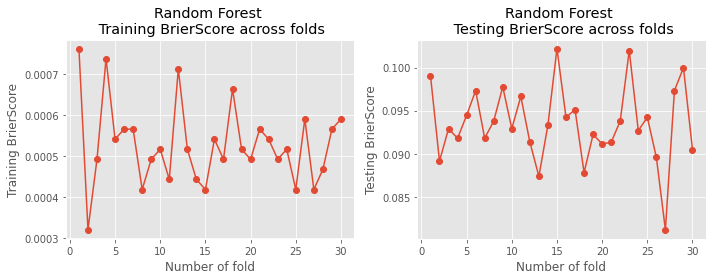

In [ ]:
#plot the BrierScore of the training phase and the accuBrierScoreracy of the testing phase
plt.figure(figsize = (10, 4))
plt.subplot(1,2,1)
plt.plot(range(1,cv.get_n_splits()+1),np.array(U_RF_list_training_BrierScore).ravel(),"o-")
plt.xlabel("Number of fold")
plt.ylabel("Training BrierScore")
plt.title("Random Forest \n Training BrierScore across folds")
plt.tight_layout()
plt.subplot(1,2,2)
plt.plot(range(1,cv.get_n_splits()+1),np.array(U_RF_list_testing_BrierScore).ravel(),"o-")
plt.xlabel("Number of fold")
plt.ylabel("Testing BrierScore")
plt.title("Random Forest \n Testing BrierScore across folds")
plt.tight_layout()
plt.show()

#From the below graphs if we looked at the the first graph "Random Forest-Training BrierScore across folds" we can see the the models fits really well as the BrierScore is almost 0
#in the second graph "Random Forest -Testing BrierScore across folds"it also fits well as the BrierScore on the test set is around 0.1. 
#That means also that we have a fitted model and stable one.

## **SMOTE**
1. In this stage the models have been built on balanced dataset using SMOTE (Oversampling technique).
2. Sampling stategy parameter in SMOTE function has been tuned for each model in order to optimize the F1 Score. 
3. The models have been tuned based on some parameters:
A. Random Forest tuned parameters are: Max depth and the n_estimators (number of trees) .
B. Decision Tree tuned parameters are: Max depth.
C. Logistic Regression tuned parameters are : Max iteration and Solver.
4. We focused on optimizing F1-Score metric as it was the smallest value in the confusion matrix in the first run

### **1. SMOTE- Hyperparameter Tuning (based on Sampling strategy and F1-Score)**
Please note that the sampling strategy is the desired ratio of the number of samples in the minority  class over the number of samples in the majority class after resampling.



In [7]:
import imblearn
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE

In [ ]:
#Tuning SMOTE for Random Forest
#This step has been run repeatedly on different ranges of sampling_strategy parameter in order to tune it on the right value.
rfweights=np.linspace(0.55,1,20)
pipe=imblearn.pipeline.make_pipeline(SMOTE(),RandomForestClassifier())
gsc=GridSearchCV(estimator=pipe,param_grid={"smote__sampling_strategy":rfweights},scoring="f1",cv=3,n_jobs=-1)
Srf_grid_result=gsc.fit(x_train,y_train)

RF-the best parameters are {'smote__sampling_strategy': 0.8342105263157895} with a score of 0.57


<AxesSubplot: title={'center': 'Random Forest'}, xlabel='weight'>

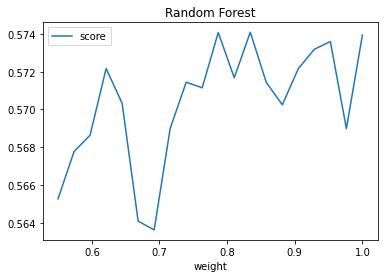

In [ ]:
#Random Forest
print("RF-the best parameters are %s with a score of %0.2f" % (Srf_grid_result.best_params_,Srf_grid_result.best_score_))#Mean cross-validated score of the best_estimator
weight_roc_auc_score_df=pd.DataFrame({"score":Srf_grid_result.cv_results_["mean_test_score"],"weight":rfweights}) 
#the score is the average of all cv folds for a single combination of the parameters you specify in the tuned_params
weight_roc_auc_score_df.plot(x="weight",title="Random Forest")

In [ ]:
#Tuning SMOTE for Decision Tree
#This step has been run repeatedly on different ranges of sampling_strategy parameter in order to tune it on the right value.
dtweights=np.linspace(0.4,1,20)
pipe=imblearn.pipeline.make_pipeline(SMOTE(),DecisionTreeClassifier())
gsc=GridSearchCV(estimator=pipe,param_grid={"smote__sampling_strategy":dtweights},scoring="f1",cv=3,n_jobs=-1)
Sdt_grid_result=gsc.fit(x_train,y_train)

DT-the best parameters are {'smote__sampling_strategy': 0.8105263157894738} with a score of 0.49


<AxesSubplot: title={'center': 'Decision Tree'}, xlabel='weight'>

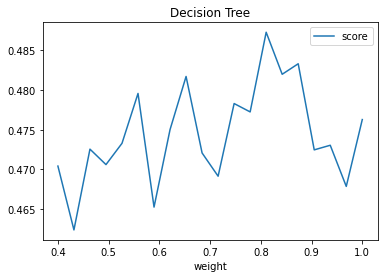

In [ ]:
#Decision Tree
print("DT-the best parameters are %s with a score of %0.2f" % (Sdt_grid_result.best_params_,Sdt_grid_result.best_score_))#Mean cross-validated score of the best_estimator
weight_roc_auc_score_df=pd.DataFrame({"score":Sdt_grid_result.cv_results_["mean_test_score"],"weight":dtweights}) 
#the score is the average of all cv folds for a single combination of the parameters you specify in the tuned_params
weight_roc_auc_score_df.plot(x="weight",title="Decision Tree")

In [ ]:
#Tuning SMOTE for Logistic Regression
#This step has been run repeatedly on different ranges of sampling_strategy parameter in order to tune it on the right value.
lgrweights=np.linspace(0.4,1,20)
pipe=imblearn.pipeline.make_pipeline(SMOTE(),LogisticRegression(n_jobs=-1))
gsc=GridSearchCV(estimator=pipe,param_grid={"smote__sampling_strategy":lgrweights},scoring="f1",cv=3,n_jobs=-1)
Slgr_grid_result=gsc.fit(x_train,y_train)

LGR-the best parameters are {'smote__sampling_strategy': 1.0} with a score of 0.56


<AxesSubplot: title={'center': 'Logistic Regression'}, xlabel='weight'>

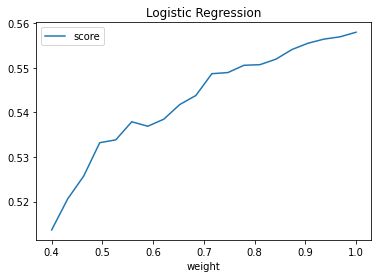

In [ ]:
#Logistic Regression
print("LGR-the best parameters are %s with a score of %0.2f" % (Slgr_grid_result.best_params_,Slgr_grid_result.best_score_))#Mean cross-validated score of the best_estimator
weight_roc_auc_score_df=pd.DataFrame({"score":Slgr_grid_result.cv_results_["mean_test_score"],"weight":lgrweights}) 
#the score is the average of all cv folds for a single combination of the parameters you specify in the tuned_params
weight_roc_auc_score_df.plot(x="weight",title="Logistic Regression")

### ***2. Data Balancing: (SMOTE)***

In [26]:
#from the above we can conclude that the best parameters for smote are:

#Random Forest:
RF_SMT_sampling_strategy=0.8342105263157895

# Decision Tree:
DT_SMT_sampling_strategy=0.8105263157894738

# Logistic Regression:
lgr_SMT_sampling_strategy=1

#These values may differ slightly on each run of the previous tunning.
#Please note that I have saved the smote-sampling strategy values (after tuning) for each model in the above variables 
#in order to make the run time shorter everytime we need to balance the data.

In [27]:
#The portions for minority and majority before smote
import numpy as np
unique,count=np.unique(y_train,return_counts=True)
y_train_dict_value_count={k:v for (k,v) in zip(unique,count)}
y_train_dict_value_count

{0: 26646, 1: 3509}

In [28]:
#SMOTE resampling-Decision Tree
from imblearn.over_sampling import SMOTE
smdt=SMOTE(sampling_strategy=DT_SMT_sampling_strategy,random_state=101)
dtx_train_res,dty_train_res=smdt.fit_resample(x_train,y_train)
unique,count=np.unique(dty_train_res,return_counts=True)
y_train_dict_value_count={k:v for (k,v) in zip(unique,count)}
y_train_dict_value_count

{0: 26646, 1: 21597}

In [29]:
#SMOTE resampling-Random Forest
smrf=SMOTE(sampling_strategy=RF_SMT_sampling_strategy,random_state=12)
rfx_train_res,rfy_train_res=smrf.fit_resample(x_train,y_train)
unique,count=np.unique(rfy_train_res,return_counts=True)
y_train_dict_value_count={k:v for (k,v) in zip(unique,count)}
y_train_dict_value_count

{0: 26646, 1: 22228}

In [30]:
#SMOTE resampling-Logistic Regression
smtlgr=SMOTE(sampling_strategy=lgr_SMT_sampling_strategy,random_state=13)
lgrx_train_res,lgry_train_res=smtlgr.fit_resample(x_train,y_train)
unique,count=np.unique(lgry_train_res,return_counts=True)
y_train_dict_value_count={k:v for (k,v) in zip(unique,count)}
y_train_dict_value_count 

{0: 26646, 1: 26646}

### **3. SMOTE- Random Forest Hyperparameter Tuning (based on max depth, number of trees and F1-Score)**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(random_state=2)

In [ ]:
import numpy as np
from sklearn.model_selection import GridSearchCV
#This step has been run repeatedly on different ranges of the model parameters in order to tune them on the right values.
max_depth_range=np.arange(10,35,1)
n_estimators_range=np.arange(120,200,20)
param_grid=dict(max_depth=max_depth_range,n_estimators=n_estimators_range)
rfgridSmote=GridSearchCV(estimator=rf,param_grid=param_grid,scoring="f1",cv=3,n_jobs=-1)

In [ ]:
rfgridSmote.fit(rfx_train_res,rfy_train_res)

In [ ]:
print("the best parameters are %s with a score of %0.2f" % (rfgridSmote.best_params_,rfgridSmote.best_score_))#Mean cross-validated score of the best_estimator
#the score is the average of all cv folds for a single combination of the parameters you specify in the tuned_params

the best parameters are {'max_depth': 32, 'n_estimators': 120} with a score of 0.93


In [ ]:
#data frame of grid search parameters and their accuracy scores
import pandas as pd

grid_results = pd.concat([pd.DataFrame(rfgridSmote.cv_results_["params"]),
                          pd.DataFrame(rfgridSmote.cv_results_["mean_test_score"], columns=["f1"])],axis=1)
grid_results.head()

#preparing data for making  contour plots
grid_contour = grid_results.groupby(['max_depth','n_estimators']).mean()
grid_contour

#pivot data:
grid_reset=grid_contour.reset_index()
grid_reset.columns=["max_depth","n_estimator","f1"]
grid_pivot=grid_reset.pivot("max_depth","n_estimator")

#assigning the pivoted data into the respective x,y, and z variables
x=grid_pivot.columns.levels[1].values
y=grid_pivot.index.values
z=grid_pivot.values

#2D contour plot
import plotly.graph_objects as go

# X and Y axes labels
layout = go.Layout(
            xaxis=go.layout.XAxis(
              title=go.layout.xaxis.Title(
              text='n_estimators')
             ),
             yaxis=go.layout.YAxis(
              title=go.layout.yaxis.Title(
              text='max_depth') 
            ) )

fig = go.Figure(data = [go.Contour(z=z, x=x, y=y)], layout=layout )

fig.update_layout(title='Hyperparameter tuning', autosize=False,
                  width=500, height=500,
                  margin=dict(l=65, r=50, b=65, t=90))

fig.show()

###  **4. SMOTE- Decision Tree Hyperparameter Tuning (based on max depth and F1-Score)**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier(random_state=2)

In [ ]:
import numpy as np
from sklearn.model_selection import GridSearchCV
#This step has been run repeatedly on different ranges of the model parameters in order to tune them on the right values.
max_depth_range=np.arange(1,20,1)
param_grid=dict(max_depth=max_depth_range)
dtgridSmote=GridSearchCV(estimator=dt,param_grid=param_grid,scoring="f1",cv=10,n_jobs=-1)

In [ ]:
dtgridSmote.fit(dtx_train_res,dty_train_res)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=2), n_jobs=-1,
             param_grid={'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19])},
             scoring='f1')

In [ ]:
print("the best parameters are %s with a score of %0.2f" % (dtgridSmote.best_params_,dtgridSmote.best_score_))#Mean cross-validated score of the best_estimator
#the score is the average of all cv folds for a single combination of the parameters you specify in the tuned_params

the best parameters are {'max_depth': 17} with a score of 0.89


### **3. SMOTE- Logistic Regression Hyperparameter Tuning (based on Max Iteration, Solver and F1-Score)**

In [ ]:
from sklearn.linear_model import LogisticRegression
lgr=LogisticRegression(random_state=10)

In [ ]:
#This step has been run repeatedly on different ranges of the model parameters in order to tune them on the right values.
import numpy as np
from sklearn.model_selection import GridSearchCV

max_iter=np.arange(1000,2100,500)
param_grid=dict(max_iter=max_iter,solver=['liblinear', 'lbfgs'])

lgrgridSmote=GridSearchCV(estimator=lgr,param_grid=param_grid,scoring="f1",cv=3,n_jobs=-1)

In [ ]:
lgrgridSmote.fit(lgrx_train_res,lgry_train_res)

GridSearchCV(cv=3, estimator=LogisticRegression(random_state=10), n_jobs=-1,
             param_grid={'max_iter': array([1000, 1500, 2000]),
                         'solver': ['liblinear', 'lbfgs']},
             scoring='f1')

In [ ]:
print("the best parameters are %s with a score of %0.2f" % (lgrgridSmote.best_params_,lgrgridSmote.best_score_))#Mean cross-validated score of the best_estimator
#the score is the average of all cv folds for a single combination of the parameters you specify in the tuned_params.
#The better Solver after resampling the data using SMOTE is "liblinear". 
#after oversamling the data "liblinear" becomes better choice.

the best parameters are {'max_iter': 1000, 'solver': 'liblinear'} with a score of 0.89


### **5. SMOTE- Train the model and calculate the run time of training the model**


In [31]:
#from the above we can conclude that the best parameters are:

#Random Forest:
SMT_RF_max_depth= 32
SMT_RF_n_estimators= 120

# Decision Tree:
SMT_DT_max_depth=17

#logistic Regression:
SMT_lgr_max_iter=1000
SMT_lgr_solver="liblinear"

#These values may differ slightly on each run of the previous tunning.
#Please note that I have saved the parameters values (after tuning) of each model in the above variables in order 
#to make the run time shorter everytime we need to train the model.'''

In [32]:
#RF
import time
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=SMT_RF_n_estimators, max_depth= SMT_RF_max_depth,random_state=2)

startrf=time.time()
rf.fit(rfx_train_res,rfy_train_res)
endrf=time.time()

#DT
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier(max_depth=SMT_DT_max_depth,random_state=2)

startdt=time.time()
dt.fit(dtx_train_res,dty_train_res)
enddt=time.time()

#LGR
from sklearn.linear_model import LogisticRegression
lgr=LogisticRegression(max_iter=SMT_lgr_max_iter,solver=SMT_lgr_solver,random_state=2)

startlgr=time.time()
lgr.fit(lgrx_train_res,lgry_train_res) 
endlgr=time.time()


print("RF Training Run Time [s]:",endrf-startrf)
print("DT Training Run Time [s]:",enddt-startdt)
print("LGR Training Run Time [s]:",endlgr-startlgr)
# The results shows the the faster model is the Logistic Regression,Decision tree, and Random Forest respectively.


RF Training Run Time [s]: 8.401374101638794
DT Training Run Time [s]: 0.51639723777771
LGR Training Run Time [s]: 0.4765207767486572


### **6. SMOTE- Run Time for prediction**

In [33]:
# the run time to predict the test set
startrf=time.time()
y_predictedrf=rf.predict(x_test)
endrf=time.time()

startdt=time.time()
y_predicteddt=dt.predict(x_test)
enddt=time.time()

startlgr=time.time()
y_predictedlgr=lgr.predict(x_test)
endlgr=time.time()

print("RF Run Time to Predict the testset [s]:",endrf-startrf)
print("DT Run Time to Predict the testset [s]:",enddt-startdt)
print("LGR Run Time to Predict the testset [s]:",endlgr-startlgr)

# The results shows the the faster model is the Logistic regression, Decision tree, and the Random forest respectively.
# Random Forest model was the slowest one( which is expected as it is an ensemble model)

RF Run Time to Predict the testset [s]: 0.3937664031982422
DT Run Time to Predict the testset [s]: 0.005202531814575195
LGR Run Time to Predict the testset [s]: 0.003000497817993164


### **7. SMOTE- Confusion Matrix**

Random Forest 
               precision    recall  f1-score   support

           0       0.95      0.93      0.94     13276
           1       0.55      0.63      0.59      1780

    accuracy                           0.90     15056
   macro avg       0.75      0.78      0.76     15056
weighted avg       0.90      0.90      0.90     15056

Decision Tree 
               precision    recall  f1-score   support

           0       0.95      0.90      0.92     13276
           1       0.45      0.64      0.53      1780

    accuracy                           0.87     15056
   macro avg       0.70      0.77      0.73     15056
weighted avg       0.89      0.87      0.88     15056

Logistic Regression 
               precision    recall  f1-score   support

           0       0.95      0.92      0.94     13276
           1       0.53      0.64      0.58      1780

    accuracy                           0.89     15056
   macro avg       0.74      0.78      0.76     15056
weighted avg       0

Text(0, -0.75, 'Logistic Regression Performance')

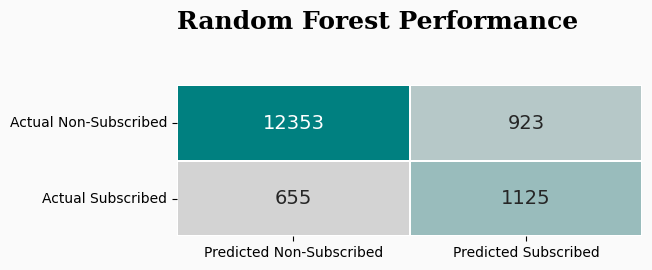

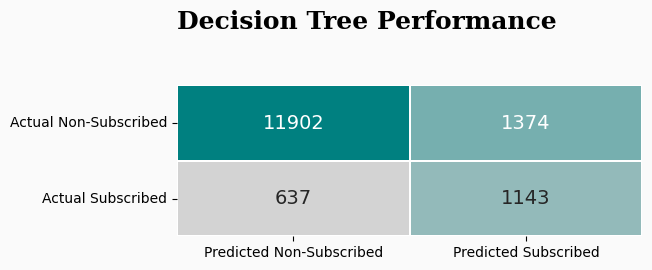

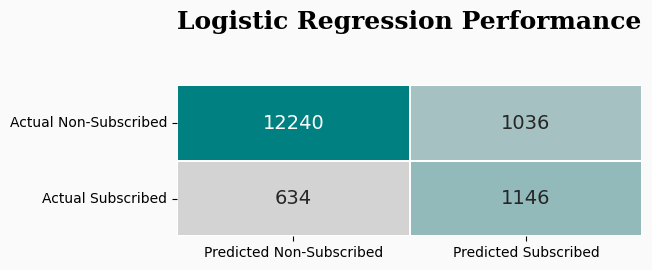

In [34]:
from sklearn.metrics import recall_score, make_scorer, confusion_matrix, classification_report,ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

class Colors:
    Gray = "#5d5d5d"
    LightGray = "#fafafa"
    Black = "#000000"
    White = "#FFFFFF"
    Teal = "#008080"
    Aquamarine = "#76c8c8"
    Blue = "#2596be"
    LightCyan = "#badbdb"
    WhiteSmoke = "#dedad2"
    Cream = "#e4bcad"
    PeachPuff = "#df979e"
    HotPink = "#d7658b"
    DeepPink = "#c80064"
    LightSeaGreen = "#20B2AA"
    DarkGray = "#464144"

#RF
fig = plt.figure(figsize=(6, 2), dpi=100, facecolor=Colors.LightGray)
gs = fig.add_gridspec(1, 1)
gs.update(wspace=0.35, hspace=0.27)
ax0 = fig.add_subplot(gs[0:1, 0:1])

cmrf = confusion_matrix(y_test,y_predictedrf)
colors = ['lightgray',Colors.Teal,Colors.Teal,Colors.Teal,Colors.Teal,Colors.Teal,Colors.Teal,Colors.Teal]
colormap = matplotlib.colors.LinearSegmentedColormap.from_list("", colors)
sns.heatmap(cmrf, cmap=colormap,annot=True,fmt="d", linewidths=1,cbar=False,
            yticklabels=['Actual Non-Subscribed','Actual Subscribed'],
            xticklabels=['Predicted Non-Subscribed','Predicted Subscribed'],annot_kws={"fontsize":14})
print("Random Forest","\n",classification_report(y_test, y_predictedrf))
ax0.text(0,-0.75,'Random Forest Performance',fontsize=18,fontweight='bold',fontfamily='serif')

#DT
fig = plt.figure(figsize=(6, 2), dpi=100, facecolor=Colors.LightGray)
gs = fig.add_gridspec(1, 1)
gs.update(wspace=0.35, hspace=0.27)
ax0 = fig.add_subplot(gs[0:1, 0:1])

cmdt = confusion_matrix(y_test,y_predicteddt)
colors = ['lightgray',Colors.Teal,Colors.Teal,Colors.Teal,Colors.Teal,Colors.Teal,Colors.Teal,Colors.Teal]
colormap = matplotlib.colors.LinearSegmentedColormap.from_list("", colors)
sns.heatmap(cmdt, cmap=colormap,annot=True,fmt="d", linewidths=1,cbar=False,
            yticklabels=['Actual Non-Subscribed','Actual Subscribed'],
            xticklabels=['Predicted Non-Subscribed','Predicted Subscribed'],annot_kws={"fontsize":14})
print("Decision Tree","\n",classification_report(y_test, y_predicteddt))
ax0.text(0,-0.75,'Decision Tree Performance',fontsize=18,fontweight='bold',fontfamily='serif')

#logistic regression
fig = plt.figure(figsize=(6, 2), dpi=100, facecolor=Colors.LightGray)
gs = fig.add_gridspec(1, 1)
gs.update(wspace=0.35, hspace=0.27)
ax0 = fig.add_subplot(gs[0:1, 0:1])

cmlgr = confusion_matrix(y_test,y_predictedlgr)
colors = ['lightgray',Colors.Teal,Colors.Teal,Colors.Teal,Colors.Teal,Colors.Teal,Colors.Teal,Colors.Teal]
colormap = matplotlib.colors.LinearSegmentedColormap.from_list("", colors)
sns.heatmap(cmlgr, cmap=colormap,annot=True,fmt="d", linewidths=1,cbar=False,
            yticklabels=['Actual Non-Subscribed','Actual Subscribed'],
            xticklabels=['Predicted Non-Subscribed','Predicted Subscribed'],annot_kws={"fontsize":14})
print("Logistic Regression","\n",classification_report(y_test, y_predictedlgr))
ax0.text(0,-0.75,'Logistic Regression Performance',fontsize=18,fontweight='bold',fontfamily='serif')

### **8. SMOTE- Calculate the AUROC**

1. Higher is better
2. Between 0 and 1

Random Forest: AUROC= 0.927
Decision Tree: AUROC= 0.768
Logistic Regression: AUROC= 0.901


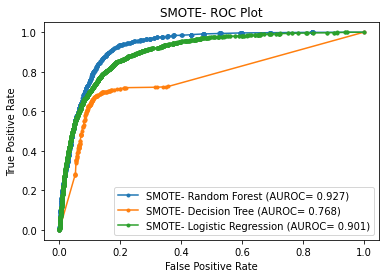

In [35]:
#to get the probabilities of the prediction for each instance in the test set
np.random.seed(2)
rf_probs= rf.predict_proba(x_test)
dt_probs= dt.predict_proba(x_test)
lgr_probs= lgr.predict_proba(x_test)

#to keep the probabilities of positive outcomes 
rf_probs=rf_probs[:,1]
rf_probs

dt_probs=dt_probs[:,1]
dt_probs

lgr_probs=lgr_probs[:,1]
lgr_probs

#print AUROC score
from sklearn.metrics import roc_curve, roc_auc_score
rf_auc=roc_auc_score(y_test,rf_probs)
dt_auc=roc_auc_score(y_test,dt_probs)
lgr_auc=roc_auc_score(y_test,lgr_probs)

print("Random Forest: AUROC= %.3f" % (rf_auc))
print("Decision Tree: AUROC= %.3f" % (dt_auc))
print("Logistic Regression: AUROC= %.3f" % (lgr_auc))

#Calculate and plot ROC curve
#roc_curve() returns three arrays, first one is false positive rate(fpr), second one is true positive rate(tpr) 
#and the third one is the threshold (_).
#For more information: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html'''
rf_fpr,rf_tpr,_=roc_curve(y_test,rf_probs)
dt_fpr,dt_tpr,_=roc_curve(y_test,dt_probs)
lgr_fpr,lgr_tpr,_=roc_curve(y_test,lgr_probs)

#plot each model:
import matplotlib.pyplot as plt
plt.plot(rf_fpr,rf_tpr,marker=".",label="SMOTE- Random Forest (AUROC= %0.3f)" % rf_auc)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

plt.plot(dt_fpr,dt_tpr,marker=".",label="SMOTE- Decision Tree (AUROC= %0.3f)" % dt_auc)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

plt.plot(lgr_fpr,lgr_tpr,marker=".",label="SMOTE- Logistic Regression (AUROC= %0.3f)" % lgr_auc)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

plt.title("SMOTE- ROC Plot")
plt.legend()
plt.show()
#The results show the best model AUROC is Random forest with 0.93 score followed by Logisitic regression and Decision tree respectivily.
#Comparing to the imbalanced section, the AUC has been decreased alittle bit as  
#logistic regression AUC decreased from 0.90 to 0.89 and Decision tree decreased from 0.86 to 0.73.
#Random Forest AUC is stable before and after SMOTE.


### **9. SMOTE- Summary (ACC,Recall, specificity,AUC,MCC, brier_score_loss,F1 Score, run time) for the models**

In [36]:
np.random.seed(2)
from sklearn.metrics import roc_curve, roc_auc_score,accuracy_score,recall_score,brier_score_loss,f1_score,matthews_corrcoef
from sklearn import tree, linear_model,ensemble 
SmoteMLA = [tree.DecisionTreeClassifier(max_depth=SMT_DT_max_depth,random_state=2),
       linear_model.LogisticRegression(max_iter=SMT_lgr_max_iter,solver=SMT_lgr_solver,random_state=2),
      
       ensemble.RandomForestClassifier(n_estimators=SMT_RF_n_estimators, max_depth=SMT_RF_max_depth,random_state=2)]
import time
name = []
Accuracy = []
Specificity=[]
Sensetivity=[]
alg_auc=[]
T_time=[]
P_time=[]
Mcc=[]
br_s=[]
f1score=[]
for alg in SmoteMLA:
    name.append(alg.__class__.__name__)

    if alg.__class__.__name__=="RandomForestClassifier":
      x_Train=rfx_train_res
      y_Train=rfy_train_res
    elif alg.__class__.__name__=="DecisionTreeClassifier":
      x_Train=dtx_train_res
      y_Train=dty_train_res
    elif alg.__class__.__name__=="LogisticRegression":
      x_Train=lgrx_train_res
      y_Train=lgry_train_res      

    
    start=time.time()
    alg.fit(x_Train,y_Train)
    end=time.time()


    startp=time.time()
    y_predicted=alg.predict(x_test)
    endp=time.time()
    Accuracy.append(accuracy_score(y_test,y_predicted))
    Specificity.append(recall_score(y_test, y_predicted, pos_label=0))
    Sensetivity.append(recall_score(y_test, y_predicted, pos_label=1))
    Mcc.append(matthews_corrcoef(y_test, y_predicted))
    br_s.append(brier_score_loss(y_test, y_predicted))
    f1score.append(f1_score(y_test, y_predicted))
    alg_probs= alg.predict_proba(x_test)
    alg_probs=alg_probs[:,1]
    alg_auc.append(roc_auc_score(y_test,alg_probs))
    T_time.append(end-start)
    P_time.append(endp-startp)

    
Smotecomparison = pd.DataFrame({"name": name, "Accuracy": Accuracy,"Sensetivity":Sensetivity,
                                "Specificity":Specificity,"AUC":alg_auc,"MCC":Mcc,
                                "Brier_score":br_s,"F1Score":f1score,"TrainingTime_s": T_time,
                                "Prediction Time [s]": P_time})
display(Smotecomparison)

#From the below results we can conclude that the random forest is slightly better than other models specially 
#if we compared them by the Brior_score, Matthew’s correlation coefficient (MCC),Accuracy, and Specificity.

#MCC: Recently alot of researches prove that it is a better measurement specially 
#for binary classification problemns along with the brier score.
#As we tuned the models and SMOTE to improve the F1 score. We can notice a slight improvement in MCC, F1 Score, and Sensetivity.

,name,Accuracy,Sensetivity,Specificity,AUC,MCC,Brier_score,F1Score,TrainingTime_s,Prediction Time [s]
0,DecisionTreeClassifier,0.866432,0.642135,0.896505,0.768310,0.466089,0.133568,0.531999,0.521719,0.005543
1,LogisticRegression,0.889081,0.643820,0.921964,0.900733,0.518932,0.110919,0.578496,0.462774,0.003030
2,RandomForestClassifier,0.895191,0.632022,0.930476,0.926821,0.529779,0.104809,0.587774,8.230517,0.398217


### **10. SMOTE- Check Over/Underfitting**
Brier Score was used to evaluate the model fitting 

The reason behind using the Brier score metric is that Brier score measures the mean squared difference between the predicted probability and the actual outcome. The Brier score always takes on a value between zero and one, since this is the largest possible difference between a predicted probability (which must be between zero and one) and the actual outcome (which can take on values of only 0 and 1). It can be decomposed is the sum of refinement loss and calibration loss.
The Brier score is appropriate for binary and categorical outcomes that can be structured as true or false, but is inappropriate for ordinal variables which can take on three or more values

Brier score is actually 1-Accuracy 

"The Brier score is a strictly proper scoring function that
is equivalent to the mean squared error" (Chicco, D., Warrens, M. J., & Jurman, G. (2021)).

*The smaller the Brier score loss, the better, hence the naming with “loss”.

1.   If the performance of the model on the training set is poor that means the model is underfitting to the test data.

2.   If the performance of the model on the test set is poor that means the model is overfitting to the training data.

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score,accuracy_score,recall_score,brier_score_loss
from sklearn import tree, linear_model,ensemble
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import validation_curve
from sklearn.model_selection import KFold,RepeatedKFold
from sklearn.model_selection import cross_val_score
import numpy as np
np.random.seed(1)
import matplotlib.pyplot as plt
plt.style.use("ggplot")

In [ ]:
#Decision Tree
# prepare the cross-validation procedure
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
SMT_DT_list_training_BrierScore=[]
SMT_DT_list_testing_BrierScore=[]

X=dff.drop(["y"],axis="columns")
y=dff.y
for train_index,test_index in cv.split(dff):
  X_train,X_test=X.iloc[train_index,:],X.iloc[test_index,:]
  Y_train,Y_test=y.iloc[train_index],y.iloc[test_index]
  model=tree.DecisionTreeClassifier(max_depth=SMT_DT_max_depth,random_state=2)

# apply the tuned smote to balance the training set:
  smdt=SMOTE(sampling_strategy=DT_SMT_sampling_strategy,random_state=10)
  dtx_train_res,dty_train_res=smdt.fit_resample(X_train,Y_train)
  
  model.fit(dtx_train_res,dty_train_res)

  y_train_data_pred=model.predict(dtx_train_res)
  y_test_data_pred=model.predict(X_test)

  SMT_DT_fold_training_BrierScore=brier_score_loss(dty_train_res,y_train_data_pred)
  SMT_DT_fold_testing_BrierScore=brier_score_loss(Y_test,y_test_data_pred)

  SMT_DT_list_training_BrierScore.append(SMT_DT_fold_training_BrierScore)
  SMT_DT_list_testing_BrierScore.append(SMT_DT_fold_testing_BrierScore)


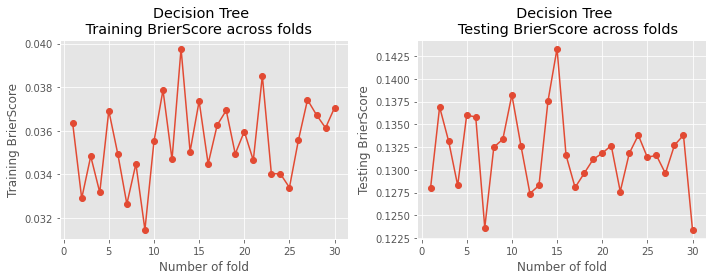

In [ ]:
#plot the BrierScore of the training phase and the BrierScore of the testing phase
plt.figure(figsize = (10, 4))
plt.subplot(1,2,1)
plt.plot(range(1,cv.get_n_splits()+1),np.array(SMT_DT_list_training_BrierScore).ravel(),"o-")
plt.xlabel("Number of fold")
plt.ylabel("Training BrierScore")
plt.title("Decision Tree \n Training BrierScore across folds   ")
plt.tight_layout()
plt.subplot(1,2,2)
plt.plot(range(1,cv.get_n_splits()+1),np.array(SMT_DT_list_testing_BrierScore).ravel(),"o-")
plt.xlabel("Number of fold")
plt.ylabel("Testing BrierScore")
plt.title("  Decision Tree \n   Testing BrierScore across folds")
plt.tight_layout()
plt.show()

#From the below graphs if we looked at the the first graph " Decision Tree-Training BrierScore across folds" we can see that the model  
#its really well as the BrierScore is around 0.03.
#In the second graph "Decision Tree -Testing BrierScore across folds"it also fits well as the BrierScore on the test set is around 0.1 .
#So it fits the training and the test set. 
#For sure random forest performs better as we can see that in the random forest test below.

In [ ]:
#Random Forest
# prepare the cross-validation procedure
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
SMT_RF_list_training_BrierScore=[]
SMT_RF_list_testing_BrierScore=[]
X=dff.drop(["y"],axis="columns")
y=dff.y
for train_index,test_index in cv.split(dff):
  X_train,X_test=X.iloc[train_index,:],X.iloc[test_index,:]
  Y_train,Y_test=y.iloc[train_index],y.iloc[test_index]
  model=ensemble.RandomForestClassifier(n_estimators=SMT_RF_n_estimators, max_depth=SMT_RF_max_depth,random_state=2)
  
# apply the tuned smote to balance the training set:
  smrf=SMOTE(sampling_strategy=RF_SMT_sampling_strategy,random_state=10)
  rfx_train_res,rfy_train_res=smrf.fit_resample(X_train,Y_train)
  
  model.fit(rfx_train_res,rfy_train_res)

  y_train_data_pred=model.predict(rfx_train_res)
  y_test_data_pred=model.predict(X_test)

  SMT_RF_fold_training_BrierScore=brier_score_loss(rfy_train_res,y_train_data_pred)
  SMT_RF_fold_testing_BrierScore=brier_score_loss(Y_test,y_test_data_pred)

  SMT_RF_list_training_BrierScore.append(SMT_RF_fold_training_BrierScore)
  SMT_RF_list_testing_BrierScore.append(SMT_RF_fold_testing_BrierScore)

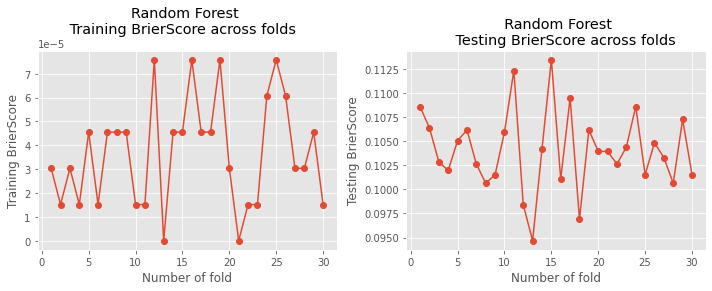

In [ ]:
#plot the BrierScore of the training phase and the BrierScore of the testing phase
plt.figure(figsize = (10, 4))
plt.subplot(1,2,1)
plt.plot(range(1,cv.get_n_splits()+1),np.array(SMT_RF_list_training_BrierScore).ravel(),"o-")
plt.xlabel("Number of fold")
plt.ylabel("Training BrierScore")
plt.title("Random Forest \n Training BrierScore across folds   ")
plt.tight_layout()
plt.subplot(1,2,2)
plt.plot(range(1,cv.get_n_splits()+1),np.array(SMT_RF_list_testing_BrierScore).ravel(),"o-")
plt.xlabel("Number of fold")
plt.ylabel("Testing BrierScore")
plt.title("  Random Forest \n    Testing BrierScore across folds")
plt.tight_layout()
plt.show()

#From the below graphs if we looked at the the first graph "Random Forest-Training BrierScore across folds" 
#we can see the the models fits really well as the BrierScore is almost 0
#In the second graph "Random Forest -Testing BrierScore across folds"it also fits well as the BrierScore on the test set is around 0.1 

In [ ]:
#Logistic Regression
# prepare the cross-validation procedure

cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
SMT_lgr_list_training_BrierScore=[]
SMT_lgr_list_testing_BrierScore=[]
X=dff.drop(["y"],axis="columns")
y=dff.y
for train_index,test_index in cv.split(dff):
  X_train,X_test=X.iloc[train_index,:],X.iloc[test_index,:]
  Y_train,Y_test=y.iloc[train_index],y.iloc[test_index]
  model=linear_model.LogisticRegression(max_iter=SMT_lgr_max_iter,solver=SMT_lgr_solver,random_state=2)

# apply the tuned smote to balance the training set:
  smlgr=SMOTE(sampling_strategy=lgr_SMT_sampling_strategy,random_state=10)
  lgrx_train_res,lgry_train_res=smlgr.fit_resample(X_train,Y_train)
  
  model.fit(lgrx_train_res,lgry_train_res)

  y_train_data_pred=model.predict(lgrx_train_res)
  y_test_data_pred=model.predict(X_test)

  SMT_lgr_fold_training_BrierScore=brier_score_loss(lgry_train_res,y_train_data_pred)
  SMT_lgr_fold_testing_BrierScore=brier_score_loss(Y_test,y_test_data_pred)

  SMT_lgr_list_training_BrierScore.append(SMT_lgr_fold_training_BrierScore)
  SMT_lgr_list_testing_BrierScore.append(SMT_lgr_fold_testing_BrierScore)

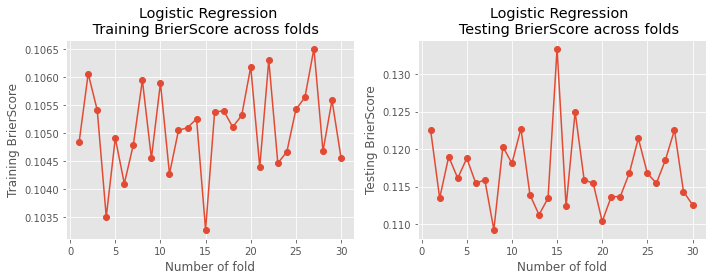

In [ ]:
#plot the BrierScore of the training phase and the BrierScore of the testing phase
plt.figure(figsize = (10, 4))
plt.subplot(1,2,1)
plt.plot(range(1,cv.get_n_splits()+1),np.array(SMT_lgr_list_training_BrierScore).ravel(),"o-")
plt.xlabel("Number of fold")
plt.ylabel("Training BrierScore")
plt.title("Logistic Regression \n Training BrierScore across folds   ")
plt.tight_layout()
plt.subplot(1,2,2)
plt.plot(range(1,cv.get_n_splits()+1),np.array(SMT_lgr_list_testing_BrierScore).ravel(),"o-")
plt.xlabel("Number of fold")
plt.ylabel("Testing BrierScore")
plt.title("Logistic Regression \n   Testing BrierScore across folds")
plt.tight_layout()
plt.show()

#From the below graphs if we looked at the the first graph " Logistic Regression-Training BrierScore across folds" we can see the the models fits really well as the BrierScore is around 0.1
#In the second graph "Logistic Regression -Testing BrierScore across folds"it also fits well as the BrierScore on the test set is around 0.1 .
#That means that we have a fitted model and stable one.

In [ ]:
display("LG_Test_BScore_Mean:", round(mean(SMT_lgr_list_testing_BrierScore),3))
display("LG_Train_BScore_Mean:", round(mean(SMT_lgr_list_training_BrierScore),3))

display("DT_Test_BScore_Mean:", round(mean(SMT_DT_list_testing_BrierScore),3))
display("DT_Train_BScore_Mean:", round(mean(SMT_DT_list_training_BrierScore),3))

display("RF_Test_BScore_Mean:", round(mean(SMT_RF_list_testing_BrierScore),3))
display("RF_Train_BScore_Mean:", round(mean(SMT_RF_list_training_BrierScore),3))

'LG_Test_BScore_Mean:'

0.117

'LG_Train_BScore_Mean:'

0.105

'DT_Test_BScore_Mean:'

0.132

'DT_Train_BScore_Mean:'

0.035

'RF_Test_BScore_Mean:'

0.104

'RF_Train_BScore_Mean:'

0.0

### ***11. SMOTE Summary without Tuning***

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score,accuracy_score,recall_score,brier_score_loss,matthews_corrcoef,f1_score
from sklearn import  tree, linear_model,ensemble  #svm, tree, linear_model, neighbors, naive_bayes, ensemble, discriminant_analysis, gaussian_process
from imblearn.over_sampling import SMOTE

SmoteMLA= [tree.DecisionTreeClassifier(random_state=14),#not tuned
       linear_model.LogisticRegression(random_state=15,n_jobs=-1),#not tuned,
       ensemble.RandomForestClassifier(random_state=13)]#not tuned]

sm= SMOTE(random_state=101)#SMOTE function without detremining and tuning the sampling strategy 

import time
name = []
Accuracy = []
Specificity=[]
Sensetivity=[]
alg_auc=[]
T_time=[]
P_time=[]
Mcc=[]
br_s=[]
f1score=[]

for alg in SmoteMLA:
    name.append(alg.__class__.__name__)
    
    #resambling
    x_Train_res,y_Train_res=sm.fit_resample(x_train,y_train)
    
    #train the models
    start=time.time()
    alg.fit(x_Train_res,y_Train_res)
    end=time.time()

    #prediting the test set by each model
    startp=time.time()
    y_predicted=alg.predict(x_test)
    endp=time.time()

    #calculating accuracy, specificity, sensetivity, MCC, brier score, F1 score
    Accuracy.append(accuracy_score(y_test,y_predicted))
    Specificity.append(recall_score(y_test, y_predicted, pos_label=0))
    Sensetivity.append(recall_score(y_test, y_predicted, pos_label=1))
    Mcc.append(matthews_corrcoef(y_test, y_predicted))
    br_s.append(brier_score_loss(y_test, y_predicted))
    f1score.append(f1_score(y_test, y_predicted))

    #computing ROC-AUC
    alg_probs= alg.predict_proba(x_test)
    alg_probs=alg_probs[:,1]
    alg_auc.append(roc_auc_score(y_test,alg_probs))

  #counting the running time of prediting and training mdoel
    T_time.append(end-start)
    P_time.append(endp-startp)

    
SMTcomparison_NotTuned = pd.DataFrame({"name": name, "Accuracy": Accuracy,"Sensetivity":Sensetivity,
                                       "Specificity":Specificity,"AUC":alg_auc,"Mcc":Mcc,
                                       "brier_score_loss":br_s,"F1Score":f1score,
                                       "Training Time [s]": T_time,"Prediction Time [s]": P_time})
display(SMTcomparison_NotTuned)
#If we compared the below result with the results of Smotecomparison,we can notice that the tuning didnt show a notable improvement in the results.

,name,Accuracy,Sensetivity,Specificity,AUC,Mcc,brier_score_loss,F1Score,Training Time [s],Prediction Time [s]
0,DecisionTreeClassifier,0.860720,0.557303,0.901401,0.729352,0.411602,0.139280,0.486155,0.817559,0.008777
1,LogisticRegression,0.890077,0.629213,0.925053,0.899705,0.515019,0.109923,0.575096,2.168229,0.006218
2,RandomForestClassifier,0.894660,0.661236,0.925957,0.926318,0.540841,0.105340,0.597462,10.280462,0.477386


## ***Random Undersampling (RUS)***

1. In this stage the models have been built on balanced dataset using Random Undersampling.
2. Sampling stategy parameter in Undersamping function has been tuned for each model in order to optimize the F1-score. 
3. The models have been tuned based on some parameters:
A. Random Forest tuned parameters are: Max depth and the n_estimators (number of trees) 
B. Decision Tree tuned parameters are: Max depth. 
C. Logistic Regression tuned parameters are : Max iteration and Solver.
4. We focused on optimizing F1-Score metric as it was the smallest value in the confusion matrix in the first run

If the performance is similar or better to SMOTE then using RUS would be chosen as this method would save more time to train models and predict outputs.

### **1. RUS Hyperparameter Tuning (based on Sampling strategy and F1-Score)**

In [ ]:
#Tuning randomundersampler for Random Forest
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from imblearn.under_sampling import RandomUnderSampler
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
import imblearn

In [ ]:
#Tuning randomundersampler for Random Forest
rfweights=np.linspace(0.3,0.5,50)
pipe=imblearn.pipeline.make_pipeline(RandomUnderSampler(),RandomForestClassifier())
gsc=GridSearchCV(estimator=pipe,param_grid={"randomundersampler__sampling_strategy":rfweights},scoring="f1",cv=3,n_jobs=-1)
RUSrf_grid_result=gsc.fit(x_train,y_train)

#Tuning randomundersampler for Decision Tree
dtweights=np.linspace(0.8,1,50)
pipe=imblearn.pipeline.make_pipeline(RandomUnderSampler(),DecisionTreeClassifier())
gsc=GridSearchCV(estimator=pipe,param_grid={"randomundersampler__sampling_strategy":dtweights},scoring="f1",cv=3,n_jobs=-1)
RUSdt_grid_result=gsc.fit(x_train,y_train)

#Tuning randomundersampler for Logistic Regression
lgrweights=np.linspace(0.4,1,20)
pipe=imblearn.pipeline.make_pipeline(RandomUnderSampler(),LogisticRegression(solver="liblinear"))
gsc=GridSearchCV(estimator=pipe,param_grid={"randomundersampler__sampling_strategy":lgrweights},scoring="f1",cv=3,n_jobs=-1)
RUSlgr_grid_result=gsc.fit(x_train,y_train)

RF-the best parameters are {'randomundersampler__sampling_strategy': 0.3816326530612245} with a score of 0.61
DT-the best parameters are {'randomundersampler__sampling_strategy': 0.8} with a score of 0.49
LGR-the best parameters are {'randomundersampler__sampling_strategy': 0.5578947368421052} with a score of 0.57


<AxesSubplot: title={'center': 'Logistic Regression'}, xlabel='weight'>

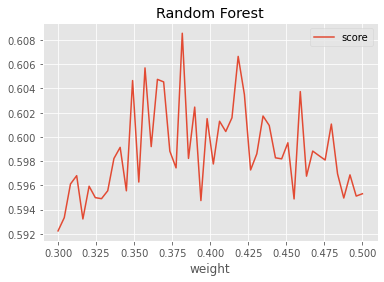

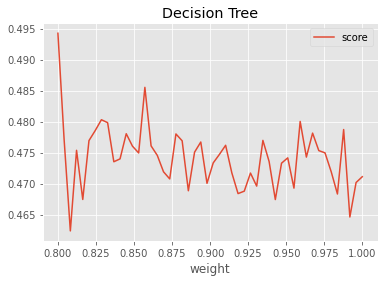

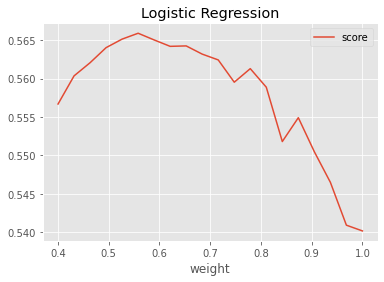

In [ ]:
#RF
print("RF-the best parameters are %s with a score of %0.2f" % (RUSrf_grid_result.best_params_,RUSrf_grid_result.best_score_))#Mean cross-validated score of the best_estimator
weight_roc_auc_score_df=pd.DataFrame({"score":RUSrf_grid_result.cv_results_["mean_test_score"],"weight":rfweights}) 
#the score is the average of all cv folds for a single combination of the parameters you specify in the tuned_params
weight_roc_auc_score_df.plot(x="weight",title="Random Forest")

#DT
print("DT-the best parameters are %s with a score of %0.2f" % (RUSdt_grid_result.best_params_,RUSdt_grid_result.best_score_))#Mean cross-validated score of the best_estimator
weight_roc_auc_score_df=pd.DataFrame({"score":RUSdt_grid_result.cv_results_["mean_test_score"],"weight":dtweights}) #the score is the average of all cv folds for a single combination of the parameters you specify in the tuned_params
weight_roc_auc_score_df.plot(x="weight",title="Decision Tree")

#Logistic Regression
print("LGR-the best parameters are %s with a score of %0.2f" % (RUSlgr_grid_result.best_params_,RUSlgr_grid_result.best_score_))#Mean cross-validated score of the best_estimator
weight_roc_auc_score_df=pd.DataFrame({"score":RUSlgr_grid_result.cv_results_["mean_test_score"],"weight":lgrweights}) #the score is the average of all cv folds for a single combination of the parameters you specify in the tuned_params
weight_roc_auc_score_df.plot(x="weight",title="Logistic Regression")

### ***2. Data Balancing: (Random UnderSampling)***

In [39]:
#Tuning randomundersampler for Random Forest
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from imblearn.under_sampling import RandomUnderSampler
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
import imblearn

In [40]:
#from the above we can conclude that the best parameters for Random Undersampling  are:

#Please note that the sampling strategy is the desired ratio of the number of samples in the minority
#class over the number of samples in the majority class after resampling.'''

#Random Forest:
RF_RUS_sampling_strategy=0.3816326530612245

# Decision Tree:
DT_RUS_sampling_strategy=0.8

# Logistic Regression:
lgr_RUS_sampling_strategy=0.5578947368421052

#These values may differ slightly on each run of the previous tunning.
#Please note that I have saved the random undersampling -sampling strategy values (after tuning) for each model 
#in the above variables in order to make the run time shorter everytime we need to balance the data.


In [41]:
#The portions for minority and majority before RUS
import numpy as np
unique,count=np.unique(y_train,return_counts=True)
y_train_dict_value_count={k:v for (k,v) in zip(unique,count)}
y_train_dict_value_count

{0: 26646, 1: 3509}

In [42]:
#Resample DT
RUSdt=RandomUnderSampler(sampling_strategy=DT_RUS_sampling_strategy,random_state=100)
dtx_train_rus,dty_train_rus=RUSdt.fit_resample(x_train,y_train)
unique,count=np.unique(dty_train_rus,return_counts=True)
y_train_dict_value_count={k:v for (k,v) in zip(unique,count)}
y_train_dict_value_count

{0: 4386, 1: 3509}

In [43]:
#Resample RF
RUSrf=RandomUnderSampler(sampling_strategy=RF_RUS_sampling_strategy,random_state=11)#
rfx_train_rus,rfy_train_rus=RUSrf.fit_resample(x_train,y_train)
unique,count=np.unique(rfy_train_rus,return_counts=True)
y_train_dict_value_count={k:v for (k,v) in zip(unique,count)}
y_train_dict_value_count

{0: 9194, 1: 3509}

In [44]:
#Resample logisitic regression
RUSlgr=RandomUnderSampler(sampling_strategy=lgr_RUS_sampling_strategy,random_state=12)
lgrx_train_rus,lgry_train_rus=RUSlgr.fit_resample(x_train,y_train)
unique,count=np.unique(lgry_train_rus,return_counts=True)
y_train_dict_value_count={k:v for (k,v) in zip(unique,count)}
y_train_dict_value_count

{0: 6289, 1: 3509}

### **3.RUS- Random Forest Hyperparameter Tuning (based on max depth, number of trees and F1-Score)**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(random_state=3)

In [ ]:
import numpy as np
from sklearn.model_selection import GridSearchCV

max_depth_range=np.arange(14,20,1)
n_estimators_range=np.arange(10,110,10)
param_grid=dict(max_depth=max_depth_range,n_estimators=n_estimators_range)
rfgridRUS=GridSearchCV(estimator=rf,param_grid=param_grid,scoring="f1",cv=3,n_jobs=-1)

In [ ]:
rfgridRUS.fit(rfx_train_rus,rfy_train_rus)

GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=3), n_jobs=-1,
             param_grid={'max_depth': array([14, 15, 16, 17, 18, 19]),
                         'n_estimators': array([ 10,  20,  30,  40,  50,  60,  70,  80,  90, 100])},
             scoring='f1')

In [ ]:
print("the best parameters are %s with a score of %0.2f" % (rfgridRUS.best_params_,rfgridRUS.best_score_))#Mean cross-validated score of the best_estimator
#the score is the average of all cv folds for a single combination of the parameters you specify in the tuned_params

the best parameters are {'max_depth': 17, 'n_estimators': 80} with a score of 0.73


In [ ]:
#data frame of grid search parameters and their accuracy scores
import pandas as pd

grid_results = pd.concat([pd.DataFrame(rfgridRUS.cv_results_["params"]),
                          pd.DataFrame(rfgridRUS.cv_results_["mean_test_score"], columns=["f1"])],axis=1)
grid_results.head()

#preparing data for making  contour plots
grid_contour = grid_results.groupby(['max_depth','n_estimators']).mean()
grid_contour

#pivot data:
grid_reset=grid_contour.reset_index()
grid_reset.columns=["max_depth","n_estimator","f1"]
grid_pivot=grid_reset.pivot("max_depth","n_estimator")

#assigning the pivoted data into the respective x,y, and z variables
x=grid_pivot.columns.levels[1].values
y=grid_pivot.index.values
z=grid_pivot.values

#2D contour plot
import plotly.graph_objects as go

# X and Y axes labels
layout = go.Layout(
            xaxis=go.layout.XAxis(
              title=go.layout.xaxis.Title(
              text='n_estimators')
             ),
             yaxis=go.layout.YAxis(
              title=go.layout.yaxis.Title(
              text='max_depth') 
            ) )

fig = go.Figure(data = [go.Contour(z=z, x=x, y=y)], layout=layout )

fig.update_layout(title='Hyperparameter tuning', autosize=False,
                  width=500, height=500,
                  margin=dict(l=65, r=50, b=65, t=90))

fig.show()

###  **4. RUS- Decision Tree Hyperparameter Tuning (based on max depth and F1-Score)**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier(random_state=3)

In [ ]:
import numpy as np
from sklearn.model_selection import GridSearchCV

max_depth_range=np.arange(1,14,2)
param_grid=dict(max_depth=max_depth_range)
dtgridRUS=GridSearchCV(estimator=dt,param_grid=param_grid,scoring="roc_auc",cv=10,n_jobs=-1)

In [ ]:
np.arange(1,14,2)

array([ 1,  3,  5,  7,  9, 11, 13])

In [ ]:
dtgridRUS.fit(dtx_train_rus,dty_train_rus)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=3), n_jobs=-1,
             param_grid={'max_depth': array([ 1,  3,  5,  7,  9, 11, 13])},
             scoring='roc_auc')

In [ ]:
print("the best parameters are %s with a score of %0.2f" % (dtgridRUS.best_params_,dtgridRUS.best_score_))#Mean cross-validated score of the best_estimator
#the score is the average of all cv folds for a single combination of the parameters you specify in the tuned_params

the best parameters are {'max_depth': 7} with a score of 0.87


### **3.RUS- Logistic Regression Hyperparameter Tuning (based on max Iteration, Solver, and F1-Score)**

In [ ]:
from sklearn.linear_model import LogisticRegression
lgr=LogisticRegression(random_state=3,n_jobs=-1)

In [ ]:
#This step has been run repeatedly on different ranges of the model parameters in order to tune them on the right values.
import numpy as np
from sklearn.model_selection import GridSearchCV

max_iter=np.arange(60,100,1)
param_grid=dict(max_iter=max_iter,solver=['liblinear', 'lbfgs'])

lgrgridRUS=GridSearchCV(estimator=lgr,param_grid=param_grid,scoring="f1",cv=3,n_jobs=-1)

In [ ]:
lgrgridRUS.fit(rfx_train_rus,rfy_train_rus)

GridSearchCV(cv=3, estimator=LogisticRegression(n_jobs=-1, random_state=3),
             n_jobs=-1,
             param_grid={'max_iter': array([60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76,
       77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93,
       94, 95, 96, 97, 98, 99]),
                         'solver': ['liblinear', 'lbfgs']},
             scoring='f1')

In [ ]:
print("the best parameters are %s with a score of %0.2f" % (lgrgridRUS.best_params_,lgrgridRUS.best_score_))#Mean cross-validated score of the best_estimator
#the score is the average of all cv folds for a single combination of the parameters you specify in the tuned_params
#lbfgs stayed as a better choice.

the best parameters are {'max_iter': 69, 'solver': 'lbfgs'} with a score of 0.65


### **5. RUS- Train the model and calculate the run time of training the model**


In [47]:
#from the above we can conclude that the best parameters are:

#Random Forest:
RUS_RF_max_depth= 17
RUS_RF_n_estimators= 80

# Decision Tree:

RUS_DT_max_depth=7

#logistic Regression:
RUS_lgr_max_iter=69
RUS_lgr_solver="lbfgs"

#These values may differ slightly on each run of the previous tunning.
#Please note that I have saved the parameters values (after tuning) of each model in the above variables 
#in order to make the run time shorter everytime we need to train the model.

In [ ]:
#RF
import time
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=RUS_RF_n_estimators, max_depth= RUS_RF_max_depth,random_state=3)

startrf=time.time()
rf.fit(rfx_train_rus,rfy_train_rus)
endrf=time.time()

#DT
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier(max_depth=RUS_DT_max_depth,random_state=3)
startdt=time.time()
dt.fit(dtx_train_rus,dty_train_rus)
enddt=time.time()

#Logistic Regression
from sklearn.linear_model import LogisticRegression
lgr=LogisticRegression(max_iter=RUS_lgr_max_iter,solver=RUS_lgr_solver,n_jobs=-1) 
# -1 means using all processors. This means that the n_jobs parameter can be used to distribute and exploit all the CPUs available in the local computer
startlgr=time.time()
lgr.fit(lgrx_train_rus,lgry_train_rus)
endlgr=time.time()


print("RF Training Run Time [s]:",endrf-startrf)
print("DT Training Run Time [s]:",enddt-startdt)
print("LGR Training Run Time [s]:",endlgr-startlgr)
#The results shows the the faster model is the Decision tree, 
#Logistic regression, and the Random forest respectively.
#Random Forest model was the slowest one( which is expected as it is an ensemble model)

RF Training Run Time [s]: 1.3602180480957031
DT Training Run Time [s]: 0.04312729835510254
LGR Training Run Time [s]: 1.021684169769287


### **6. RUS- Run Time for prediction**

In [ ]:
# the run time to predict the test set
startrf=time.time()
y_predictedrf=rf.predict(x_test)
endrf=time.time()

startdt=time.time()
y_predicteddt=dt.predict(x_test)
enddt=time.time()

startlgr=time.time()
y_predictedlgr=lgr.predict(x_test)
endlgr=time.time()

print("RF Run Time to Predict the testset [s]:",endrf-startrf)
print("DT Run Time to Predict the testset [s]:",enddt-startdt)
print("LGR Run Time to Predict the testset [s]:",endlgr-startlgr)

# The results shows the the faster model is the Logistic regression,Decision tree, and the Random forest respectively.
# Random Forest model was the slowest one( which is expected as it is an ensemble model)

RF Run Time to Predict the testset [s]: 0.2660255432128906
DT Run Time to Predict the testset [s]: 0.006936311721801758
LGR Run Time to Predict the testset [s]: 0.005370140075683594


### **7. RUS- Confusion Matrix**

Random Forest 
               precision    recall  f1-score   support

           0       0.96      0.92      0.94     13276
           1       0.54      0.72      0.62      1780

    accuracy                           0.89     15056
   macro avg       0.75      0.82      0.78     15056
weighted avg       0.91      0.89      0.90     15056

Decision Tree 
               precision    recall  f1-score   support

           0       0.97      0.83      0.89     13276
           1       0.39      0.81      0.53      1780

    accuracy                           0.83     15056
   macro avg       0.68      0.82      0.71     15056
weighted avg       0.90      0.83      0.85     15056

Logistic Regression 
               precision    recall  f1-score   support

           0       0.95      0.91      0.93     13276
           1       0.51      0.68      0.58      1780

    accuracy                           0.89     15056
   macro avg       0.73      0.80      0.76     15056
weighted avg       0

Text(0, -0.75, 'Logistic Regression Performance')

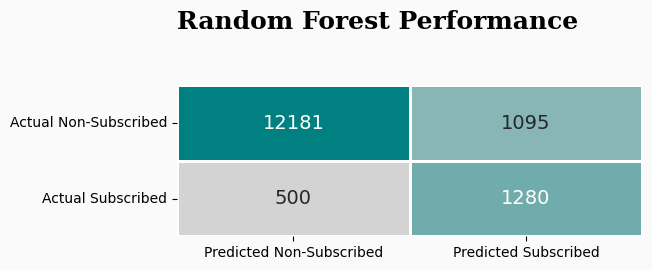

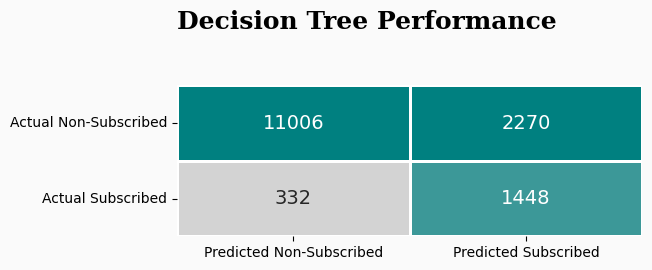

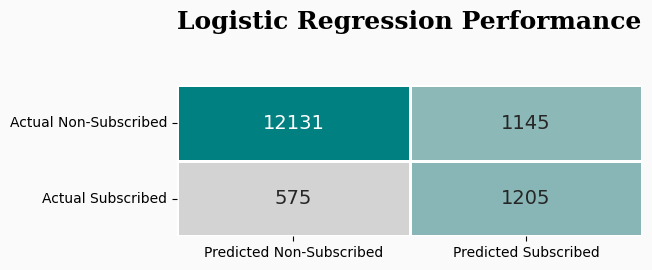

In [ ]:
from sklearn.metrics import recall_score, make_scorer, confusion_matrix, classification_report,ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

class Colors:
    Gray = "#5d5d5d"
    LightGray = "#fafafa"
    Black = "#000000"
    White = "#FFFFFF"
    Teal = "#008080"
    Aquamarine = "#76c8c8"
    Blue = "#2596be"
    LightCyan = "#badbdb"
    WhiteSmoke = "#dedad2"
    Cream = "#e4bcad"
    PeachPuff = "#df979e"
    HotPink = "#d7658b"
    DeepPink = "#c80064"
    LightSeaGreen = "#20B2AA"
    DarkGray = "#464144"
#RF
fig = plt.figure(figsize=(6, 2), dpi=100, facecolor=Colors.LightGray)
gs = fig.add_gridspec(1, 1)
gs.update(wspace=0.35, hspace=0.27)
ax0 = fig.add_subplot(gs[0:1, 0:1])

cmrf = confusion_matrix(y_test,y_predictedrf)
colors = ['lightgray',Colors.Teal,Colors.Teal,Colors.Teal,Colors.Teal,Colors.Teal,Colors.Teal,Colors.Teal]
colormap = matplotlib.colors.LinearSegmentedColormap.from_list("", colors)
sns.heatmap(cmrf, cmap=colormap,annot=True,fmt="d", linewidths=1,cbar=False,
            yticklabels=['Actual Non-Subscribed','Actual Subscribed'],
            xticklabels=['Predicted Non-Subscribed','Predicted Subscribed'],annot_kws={"fontsize":14})
print("Random Forest","\n",classification_report(y_test, y_predictedrf))
ax0.text(0,-0.75,'Random Forest Performance',fontsize=18,fontweight='bold',fontfamily='serif')

#DT
fig = plt.figure(figsize=(6, 2), dpi=100, facecolor=Colors.LightGray)
gs = fig.add_gridspec(1, 1)
gs.update(wspace=0.35, hspace=0.27)
ax0 = fig.add_subplot(gs[0:1, 0:1])

cmdt = confusion_matrix(y_test,y_predicteddt)
colors = ['lightgray',Colors.Teal,Colors.Teal,Colors.Teal,Colors.Teal,Colors.Teal,Colors.Teal,Colors.Teal]
colormap = matplotlib.colors.LinearSegmentedColormap.from_list("", colors)
sns.heatmap(cmdt, cmap=colormap,annot=True,fmt="d", linewidths=1,cbar=False,
            yticklabels=['Actual Non-Subscribed','Actual Subscribed'],
            xticklabels=['Predicted Non-Subscribed','Predicted Subscribed'],annot_kws={"fontsize":14})
print("Decision Tree","\n",classification_report(y_test, y_predicteddt))
ax0.text(0,-0.75,'Decision Tree Performance',fontsize=18,fontweight='bold',fontfamily='serif')


#logistic regression
fig = plt.figure(figsize=(6, 2), dpi=100, facecolor=Colors.LightGray)
gs = fig.add_gridspec(1, 1)
gs.update(wspace=0.35, hspace=0.27)
ax0 = fig.add_subplot(gs[0:1, 0:1])

cmlgr = confusion_matrix(y_test,y_predictedlgr)
colors = ['lightgray',Colors.Teal,Colors.Teal,Colors.Teal,Colors.Teal,Colors.Teal,Colors.Teal,Colors.Teal]
colormap = matplotlib.colors.LinearSegmentedColormap.from_list("", colors)
sns.heatmap(cmlgr, cmap=colormap,annot=True,fmt="d", linewidths=1,cbar=False,
            yticklabels=['Actual Non-Subscribed','Actual Subscribed'],
            xticklabels=['Predicted Non-Subscribed','Predicted Subscribed'],annot_kws={"fontsize":14})
print("Logistic Regression","\n",classification_report(y_test, y_predictedlgr))
ax0.text(0,-0.75,'Logistic Regression Performance',fontsize=18,fontweight='bold',fontfamily='serif')

### **8.RUS- Calculate the AUROC**

Random Forest: AUROC= 0.929
Decision Tree: AUROC= 0.870
Logistic Regression: AUROC= 0.910


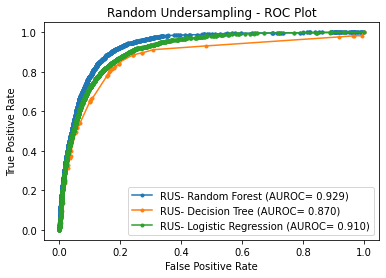

In [ ]:
#to get the probabilities of the prediction for each instance in the test set

rf_probs= rf.predict_proba(x_test)
dt_probs= dt.predict_proba(x_test)
lgr_probs= lgr.predict_proba(x_test)

#to keep the probabilities of positive outcomes 
rf_probs=rf_probs[:,1]
rf_probs

dt_probs=dt_probs[:,1]
dt_probs

lgr_probs=lgr_probs[:,1]
lgr_probs

#print AUROC score
from sklearn.metrics import roc_curve, roc_auc_score
rf_auc=roc_auc_score(y_test,rf_probs)
dt_auc=roc_auc_score(y_test,dt_probs)
lgr_auc=roc_auc_score(y_test,lgr_probs)

print("Random Forest: AUROC= %.3f" % (rf_auc))
print("Decision Tree: AUROC= %.3f" % (dt_auc))
print("Logistic Regression: AUROC= %.3f" % (lgr_auc))

#Calculate and plot ROC curve
#roc_curve() returns three arrays, first one is false positive rate(fpr), 
#second one is true positive rate(tpr) and the third one is the threshold (_).
#For more information: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html

rf_fpr,rf_tpr,_=roc_curve(y_test,rf_probs)
dt_fpr,dt_tpr,_=roc_curve(y_test,dt_probs)
lgr_fpr,lgr_tpr,_=roc_curve(y_test,lgr_probs)

import matplotlib.pyplot as plt
plt.plot(rf_fpr,rf_tpr,marker=".",label="RUS- Random Forest (AUROC= %0.3f)" % rf_auc)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

plt.plot(dt_fpr,dt_tpr,marker=".",label="RUS- Decision Tree (AUROC= %0.3f)" % dt_auc)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

plt.plot(lgr_fpr,lgr_tpr,marker=".",label="RUS- Logistic Regression (AUROC= %0.3f)" % lgr_auc)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

plt.title("Random Undersampling - ROC Plot")
plt.legend()
plt.show()

#The results show the best model AUROC is Random forest with 0.93 score followed by 
#Logisitic regression and Decision tree respectivily.
#Comparing to the imbalanced section, the AUC has been increased slightly in Decision tree from 0.84 to 0.86.
#Random Forest and logistic regression are stable before and after Random UnderSampling.

#Comparing to the SMOTE section, the AUC has been increased slightly as logistic regression AUC
# increased from 0.89 to 0.91 and Decision tree increased from 0.77 to 0.87.
#Random Forest is stable before and after Random UnderSampling.


### **9. RUS- Summary (ACC,Recall, specificity,AUC,MCC, brier_score_loss, F1 Score, run time) for the models**

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score,accuracy_score,recall_score,brier_score_loss,matthews_corrcoef,f1_score
from sklearn import  tree, linear_model,ensemble

RUSMLA = [tree.DecisionTreeClassifier(max_depth=RUS_DT_max_depth,random_state=3),
       linear_model.LogisticRegression(max_iter=RUS_lgr_max_iter,solver=RUS_lgr_solver,random_state=3,n_jobs=-1),
       # -1 means using all processors. This means that the n_jobs parameter can be used to distribute and exploit all the CPUs available in the local computer
       ensemble.RandomForestClassifier(n_estimators=RUS_RF_n_estimators, max_depth=RUS_RF_max_depth,random_state=3)
       ]

import time
name = []
Accuracy = []
Specificity=[]
Sensetivity=[]
alg_auc=[]
T_time=[]
P_time=[]
Mcc=[]
br_s=[]
f1score=[]
for alg in RUSMLA:
    name.append(alg.__class__.__name__)

    if alg.__class__.__name__=="RandomForestClassifier":
      x_Train=rfx_train_rus
      y_Train=rfy_train_rus
    elif alg.__class__.__name__=="DecisionTreeClassifier":
      x_Train=dtx_train_rus
      y_Train=dty_train_rus
    elif alg.__class__.__name__=="LogisticRegression":
      x_Train=lgrx_train_rus
      y_Train=lgry_train_rus


    
    start=time.time()
    alg.fit(x_Train,y_Train)
    end=time.time()


    startp=time.time()
    y_predicted=alg.predict(x_test)
    endp=time.time()
    Accuracy.append(accuracy_score(y_test,y_predicted))
    Specificity.append(recall_score(y_test, y_predicted, pos_label=0))
    Sensetivity.append(recall_score(y_test, y_predicted, pos_label=1))
    Mcc.append(matthews_corrcoef(y_test, y_predicted))
    br_s.append(brier_score_loss(y_test, y_predicted))
    f1score.append(f1_score(y_test, y_predicted))
    alg_probs= alg.predict_proba(x_test)
    alg_probs=alg_probs[:,1]
    alg_auc.append(roc_auc_score(y_test,alg_probs))
    T_time.append(end-start)
    P_time.append(endp-startp)

    
RUScomparison = pd.DataFrame({"name": name, "Accuracy": Accuracy,"Sensetivity":Sensetivity,"Specificity":Specificity,
                              "AUC":alg_auc,"Mcc":Mcc,"brier_score_loss":br_s,"F1Score":f1score,
                              "TrainingTime_s": T_time,"Prediction Time [s]": P_time})
display(RUScomparison)

#From the below results we can conclude that the random forest is slightly better than other models 
#specially if we compared them by the Brior_score,
#Matthew’s correlation coefficient (MCC),Specificity,and AUC.
#Recently alot of researches prove that MCC is a better measurement specially
#for binary classification problems along with the brier score.
# we can notice if we compared the results of this summary with the summary of SMOTE that the undersampling techniques improves the performance more than applying SMOTE technique


,name,Accuracy,Sensetivity,Specificity,AUC,Mcc,brier_score_loss,F1Score,TrainingTime_s,Prediction Time [s]
0,DecisionTreeClassifier,0.827179,0.813483,0.829015,0.869632,0.481052,0.172821,0.526737,0.041147,0.007113
1,LogisticRegression,0.885760,0.676966,0.913754,0.909707,0.525518,0.114240,0.583535,0.609840,0.005797
2,RandomForestClassifier,0.894062,0.719101,0.917520,0.929225,0.563918,0.105938,0.616125,1.350638,0.287884


### **10. RUS- Check Over/Underfitting**
Brier Score was used to evaluate the model fitting

The reason behind using the Brier score metric is that Brier score measures the mean squared difference between the predicted probability and the actual outcome. The Brier score always takes on a value between zero and one, since this is the largest possible difference between a predicted probability (which must be between zero and one) and the actual outcome (which can take on values of only 0 and 1). It can be decomposed is the sum of refinement loss and calibration loss. The Brier score is appropriate for binary and categorical outcomes that can be structured as true or false, but is inappropriate for ordinal variables which can take on three or more values

Brier score is actually 1-Accuracy

"The Brier score is a strictly proper scoring function that is equivalent to the mean squared error" (Chicco, D., Warrens, M. J., & Jurman, G. (2021)).

*The smaller the Brier score loss, the better, hence the naming with “loss”.

If the performance of the model on the training set is poor that means the model is underfitting to the test data.

If the performance of the model on the test set is poor that means the model is overfitting to the training data.

In [48]:
from sklearn.metrics import roc_curve, roc_auc_score,accuracy_score,recall_score,brier_score_loss
from sklearn import tree, linear_model,ensemble
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import validation_curve
from sklearn.model_selection import RepeatedKFold
import numpy as np
np.random.seed(3)
import matplotlib.pyplot as plt
plt.style.use("ggplot")

In [49]:
#Decision Tree
# prepare the cross-validation procedure
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
RUS_DT_list_training_BrierScore=[]
RUS_DT_list_testing_BrierScore=[]
X=dff.drop(["y"],axis="columns")
y=dff.y
for train_index,test_index in cv.split(dff):
  X_train,X_test=X.iloc[train_index,:],X.iloc[test_index,:]
  Y_train,Y_test=y.iloc[train_index],y.iloc[test_index]
  model=tree.DecisionTreeClassifier(max_depth=RUS_DT_max_depth,random_state=3)

# apply the tuned Random Undersampling to balance the training set:
  RUSdt=RandomUnderSampler(sampling_strategy=DT_RUS_sampling_strategy,random_state=11)
  dtx_train_rus,dty_train_rus=RUSdt.fit_resample(X_train,Y_train)
  
  model.fit(dtx_train_rus,dty_train_rus)

  y_train_data_pred=model.predict(dtx_train_rus)
  y_test_data_pred=model.predict(X_test)

  RUS_DT_fold_training_BrierScore=brier_score_loss(dty_train_rus,y_train_data_pred)
  RUS_DT_fold_testing_BrierScore=brier_score_loss(Y_test,y_test_data_pred)

  RUS_DT_list_training_BrierScore.append(RUS_DT_fold_training_BrierScore)
  RUS_DT_list_testing_BrierScore.append(RUS_DT_fold_testing_BrierScore)

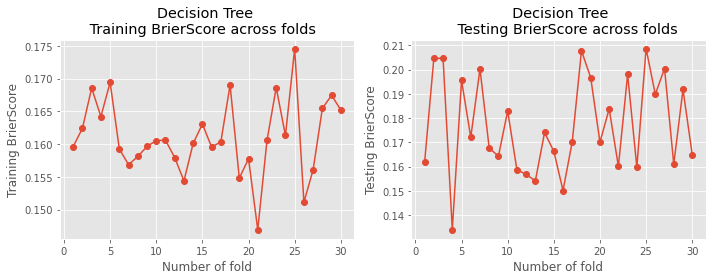

In [50]:
#plot the BrierScore of the training phase and the BrierScore of the testing phase
plt.figure(figsize = (10, 4))
plt.subplot(1,2,1)
plt.plot(range(1,cv.get_n_splits()+1),np.array(RUS_DT_list_training_BrierScore).ravel(),"o-")
plt.xlabel("Number of fold")
plt.ylabel("Training BrierScore")
plt.title("Decision Tree \n Training BrierScore across folds   ")
plt.tight_layout()
plt.subplot(1,2,2)
plt.plot(range(1,cv.get_n_splits()+1),np.array(RUS_DT_list_testing_BrierScore).ravel(),"o-")
plt.xlabel("Number of fold")
plt.ylabel("Testing BrierScore")
plt.title("  Decision Tree \n    Testing BrierScore across folds")
plt.tight_layout()
plt.show()

#From the below graphs if we looked at the the first graph " Decision Tree-Training BrierScore across folds",
#we can see the the models fits really well as the BrierScore is around 0.2
#In the second graph "Decision Tree -Testing BrierScore across folds"it also fits well as the BrierScore on the test set is around 0.2. 
#That means also that we have a fitted model and stable one.

In [51]:
#Logistic Regression
# prepare the cross-validation procedure
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

RUS_lgr_list_training_BrierScore=[]
RUS_lgr_list_testing_BrierScore=[]

X=dff.drop(["y"],axis="columns")
y=dff.y

for train_index,test_index in cv.split(dff):
  X_train,X_test=X.iloc[train_index,:],X.iloc[test_index,:]
  Y_train,Y_test=y.iloc[train_index],y.iloc[test_index]
  model=linear_model.LogisticRegression(max_iter=RUS_lgr_max_iter,solver=RUS_lgr_solver,random_state=3,n_jobs=-1)
  
# apply the tuned RUS to balance/resample the training set:
  RUSlgr=RandomUnderSampler(sampling_strategy=lgr_RUS_sampling_strategy,random_state=11)
  lgrx_train_rus,lgry_train_rus=RUSlgr.fit_resample(X_train,Y_train)
  
  model.fit(lgrx_train_rus,lgry_train_rus)

  y_train_data_pred=model.predict(lgrx_train_rus)
  y_test_data_pred=model.predict(X_test)

  RUS_lgr_fold_training_BrierScore=brier_score_loss(lgry_train_rus,y_train_data_pred)
  RUS_lgr_fold_testing_BrierScore=brier_score_loss(Y_test,y_test_data_pred)

  RUS_lgr_list_training_BrierScore.append(RUS_lgr_fold_training_BrierScore)
  RUS_lgr_list_testing_BrierScore.append(RUS_lgr_fold_testing_BrierScore)

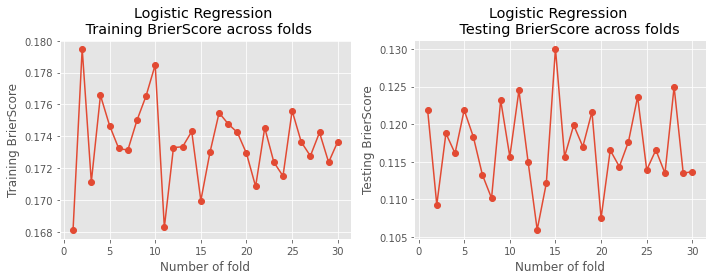

In [52]:
#plot the BrierScore of the training phase and the BrierScore of the testing phase
plt.figure(figsize = (10, 4))
plt.subplot(1,2,1)
plt.plot(range(1,cv.get_n_splits()+1),np.array(RUS_lgr_list_training_BrierScore).ravel(),"o-")
plt.xlabel("Number of fold")
plt.ylabel("Training BrierScore")
plt.title("Logistic Regression \n Training BrierScore across folds    ")
plt.tight_layout()
plt.subplot(1,2,2)
plt.plot(range(1,cv.get_n_splits()+1),np.array(RUS_lgr_list_testing_BrierScore).ravel(),"o-")
plt.xlabel("Number of fold")
plt.ylabel("Testing BrierScore")
plt.title("Logistic Regression \n    Testing BrierScore across folds")
plt.tight_layout()
plt.show()

#From the below graphs if we looked at the the first graph "Logistic Regression-Training BrierScore across folds",
#we can see the the models fits well as the BrierScore is about 0.2 
#In the second graph "Logistic Regression -Training BrierScore across folds"
#it also fits well as the BrierScore on the test set is about 0.1. that means also that we have a fitted model and stable one.

In [53]:
#Random Forest
# prepare the cross-validation procedure
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
RUS_RF_list_training_BrierScore=[]
RUS_RF_list_testing_BrierScore=[]
X=dff.drop(["y"],axis="columns")
y=dff.y
for train_index,test_index in cv.split(dff):
  X_train,X_test=X.iloc[train_index,:],X.iloc[test_index,:]
  Y_train,Y_test=y.iloc[train_index],y.iloc[test_index]
  model=ensemble.RandomForestClassifier(n_estimators=RUS_RF_n_estimators,
                                        max_depth=RUS_RF_max_depth,random_state=3)
  
# apply the tuned RUS to balance the training set:
  RUSrf=RandomUnderSampler(sampling_strategy=RF_RUS_sampling_strategy,random_state=11)
  rfx_train_rus,rfy_train_rus=RUSrf.fit_resample(X_train,Y_train)
  
  model.fit(rfx_train_rus,rfy_train_rus)

  y_train_data_pred=model.predict(rfx_train_rus)
  y_test_data_pred=model.predict(X_test)

  RUS_RF_fold_training_BrierScore=brier_score_loss(rfy_train_rus,y_train_data_pred)
  RUS_RF_fold_testing_BrierScore=brier_score_loss(Y_test,y_test_data_pred)

  RUS_RF_list_training_BrierScore.append(RUS_RF_fold_training_BrierScore)
  RUS_RF_list_testing_BrierScore.append(RUS_RF_fold_testing_BrierScore)


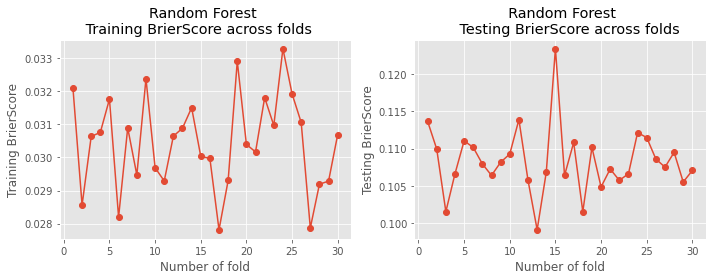

In [54]:
#plot the BrierScore of the training phase and the BrierScore of the testing phase
plt.figure(figsize = (10, 4))
plt.subplot(1,2,1)
plt.plot(range(1,cv.get_n_splits()+1),np.array(RUS_RF_list_training_BrierScore).ravel(),"o-")
plt.xlabel("Number of fold")
plt.ylabel("Training BrierScore")
plt.title("Random Forest \n Training BrierScore across folds    ")
plt.tight_layout()
plt.subplot(1,2,2)
plt.plot(range(1,cv.get_n_splits()+1),np.array(RUS_RF_list_testing_BrierScore).ravel(),"o-")
plt.xlabel("Number of fold")
plt.ylabel("Testing BrierScore")
plt.title("  Random Forest \n    Testing BrierScore across folds")
plt.tight_layout()
plt.show()

#From the below graphs if we looked at the the first graph "Random Forest-Training BrierScore across folds"
#we can see the the models fits really well as the BrierScore is around 0
#in the second graph "Random Forest -Testing BrierScore across folds"it also fits well as the BrierScore on the test set is around 0.1. 
#That means also that we have a fitted model and stable one.

In [56]:
from statistics import mean
display("LG_Test_BScore_Mean:", round(mean(RUS_lgr_list_testing_BrierScore),3))
display("LG_Train_BScore_Mean:", round(mean(RUS_lgr_list_training_BrierScore),3))

display("DT_Test_BScore_Mean:", round(mean(RUS_DT_list_testing_BrierScore),3))
display("DT_Train_BScore_Mean:", round(mean(RUS_DT_list_training_BrierScore),3))

display("RF_Test_BScore_Mean:", round(mean(RUS_RF_list_testing_BrierScore),3))
display("RF_Train_BScore_Mean:", round(mean(RUS_RF_list_training_BrierScore),3))

'LG_Test_BScore_Mean:'

0.117

'LG_Train_BScore_Mean:'

0.174

'DT_Test_BScore_Mean:'

0.177

'DT_Train_BScore_Mean:'

0.161

'RF_Test_BScore_Mean:'

0.108

'RF_Train_BScore_Mean:'

0.03

### ***11. RUS Summary without Tuning***


In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score,accuracy_score,recall_score,brier_score_loss,matthews_corrcoef,f1_score
from sklearn import  tree, linear_model,ensemble  

RUSMLA = [tree.DecisionTreeClassifier(random_state=4),#not tuned
       linear_model.LogisticRegression(n_jobs=-1),#not tuned,
       ensemble.RandomForestClassifier(random_state=3)]#not tuned]

RUS=RandomUnderSampler(random_state=100)
#random undersampling function without detremining and tuning the sampling strategy 

import time
name = []
Accuracy = []
Specificity=[]
Sensetivity=[]
alg_auc=[]
T_time=[]
P_time=[]
Mcc=[]
br_s=[]
f1score=[]
for alg in RUSMLA:
    name.append(alg.__class__.__name__)
    
    #resambling
    x_Train_rus,y_Train_rus=RUS.fit_resample(x_train,y_train)
    
    #train the models
    start=time.time()
    alg.fit(x_Train_rus,y_Train_rus)
    end=time.time()

    #prediting the test set by each model
    startp=time.time()
    y_predicted=alg.predict(x_test)
    endp=time.time()

    #calculating accuracy, specificity, sensetivity, MCC, brier score,F1 Score
    Accuracy.append(accuracy_score(y_test,y_predicted))
    Specificity.append(recall_score(y_test, y_predicted, pos_label=0))
    Sensetivity.append(recall_score(y_test, y_predicted, pos_label=1))
    Mcc.append(matthews_corrcoef(y_test, y_predicted))
    br_s.append(brier_score_loss(y_test, y_predicted))
    f1score.append(f1_score(y_test, y_predicted))

    #computing ROC-AUC
    alg_probs= alg.predict_proba(x_test)
    alg_probs=alg_probs[:,1]
    alg_auc.append(roc_auc_score(y_test,alg_probs))

  #counting the running time of prediting and training mdoel
    T_time.append(end-start)
    P_time.append(endp-startp)

    
RUScomparison_NotTuned = pd.DataFrame({"name": name, "Accuracy": Accuracy,"Sensetivity":Sensetivity,
                                       "Specificity":Specificity,"AUC":alg_auc,"Mcc":Mcc,"brier_score_loss":br_s,"F1Score":f1score,
                                       "Training Time [s]": T_time,"Prediction Time [s]": P_time})
display(RUScomparison_NotTuned)
#If we compared the below result with the results of Smotecomparison,
#we can notice the importance of the tuning as most of these measurements have improved. 

,name,Accuracy,Sensetivity,Specificity,AUC,Mcc,brier_score_loss,F1Score,Training Time [s],Prediction Time [s]
0,DecisionTreeClassifier,0.808050,0.792135,0.810184,0.801159,0.442796,0.191950,0.493870,0.070006,0.007898
1,LogisticRegression,0.842853,0.808989,0.847394,0.907632,0.503436,0.157147,0.548990,1.119425,0.005370
2,RandomForestClassifier,0.836610,0.890449,0.829391,0.922392,0.532751,0.163390,0.563055,1.056865,0.367377


## ***Random Forest Feature Importance***
The important features for Random Forest have been extracted based on the best balancing strategy that improved the performance of the Random Forest, which is the random undersampling 




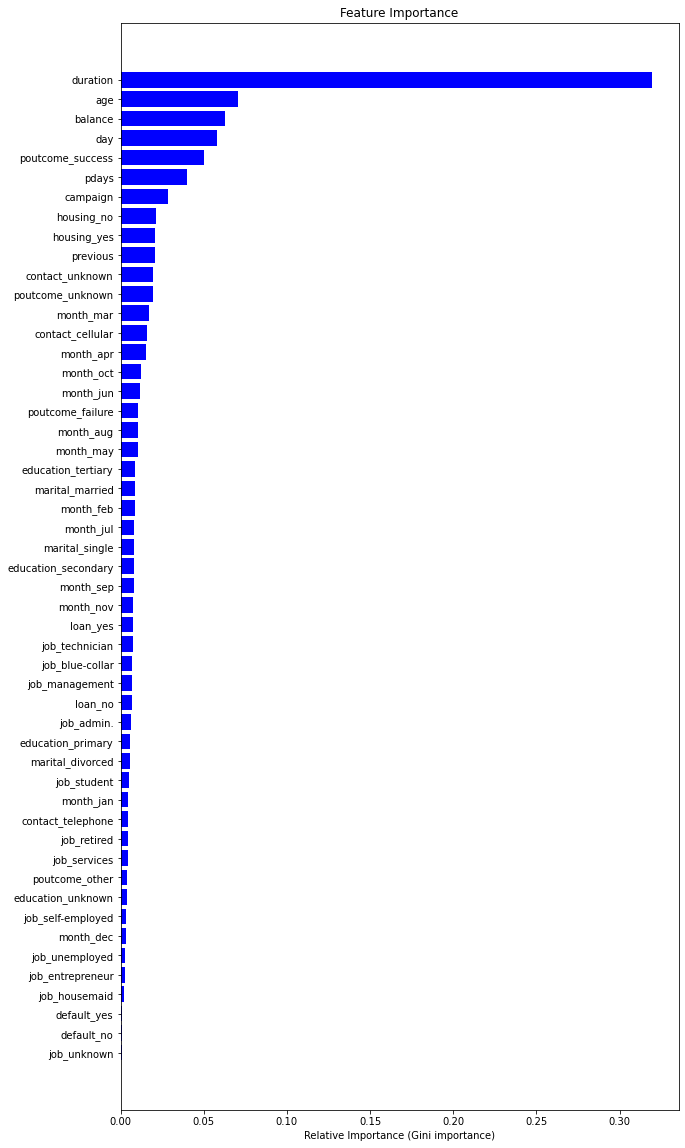

In [ ]:
#important note: The model parameters have been adjusted based on the best balancing method. 
rf=RandomForestClassifier(n_estimators=RUS_RF_n_estimators,
                          max_depth= RUS_RF_max_depth,random_state=3)
rf.fit(rfx_train_rus,rfy_train_rus)

import matplotlib.pyplot as plt
import seaborn as sns

features=dff.loc[:, dff.columns != 'y'].columns
importances=rf.feature_importances_
indices=np.argsort(importances)

f = plt.figure()
f.set_figwidth(10)
f.set_figheight(20)
plt.title("Feature Importance")
plt.barh(range(len(indices)),importances[indices],color="b",align="center",height=.8)
plt.yticks(range(len(indices)),[features[i] for i in indices])
plt.xlabel("Relative Importance (Gini importance)")
plt.show()

In [ ]:
import pandas as pd
df_1=pd.DataFrame({"Feature names":features,"Importances":rf.feature_importances_})
df_1=df_1.sort_values(by="Importances",ascending=False)
df_1

,Feature names,Importances
3,duration,0.319455
0,age,0.070855
1,balance,0.062890
2,day,0.057665
49,poutcome_success,0.050000
5,pdays,0.040041
4,campaign,0.028371
28,housing_no,0.021126
29,housing_yes,0.020490
6,previous,0.020401


In [ ]:
#features with importance more than or equal the mean:
df_1[df_1["Importances"]>=df_1["Importances"].mean()]

,Feature names,Importances
3,duration,0.319455
0,age,0.070855
1,balance,0.062890
2,day,0.057665
49,poutcome_success,0.050000
5,pdays,0.040041
4,campaign,0.028371
28,housing_no,0.021126
29,housing_yes,0.020490
6,previous,0.020401


In [ ]:
#or we can just use SelectFromModel to extract the selected features
# SelectFromModel accepts a threshold parameter 
#and will select the features whose importance (defined by the coefficients) are above this threshold. 
# the threshold is the mean by default
from sklearn.feature_selection import SelectFromModel
rf=ensemble.RandomForestClassifier(n_estimators=RUS_RF_n_estimators, 
                                   max_depth=RUS_RF_max_depth,random_state=3)
rf.fit(rfx_train_rus,rfy_train_rus)

FS = SelectFromModel(rf)
FS.fit(rfx_train_rus, rfy_train_rus)
FS.get_support()
Important_Features= rfx_train_rus.columns[(FS.get_support())]
impresult=pd.DataFrame({"Important_Features": Important_Features})
display(impresult)

,Important_Features
0,age
1,balance
2,day
3,duration
4,campaign
5,pdays
6,previous
7,housing_no
8,housing_yes
9,contact_unknown


## ***DT Feature Importance***


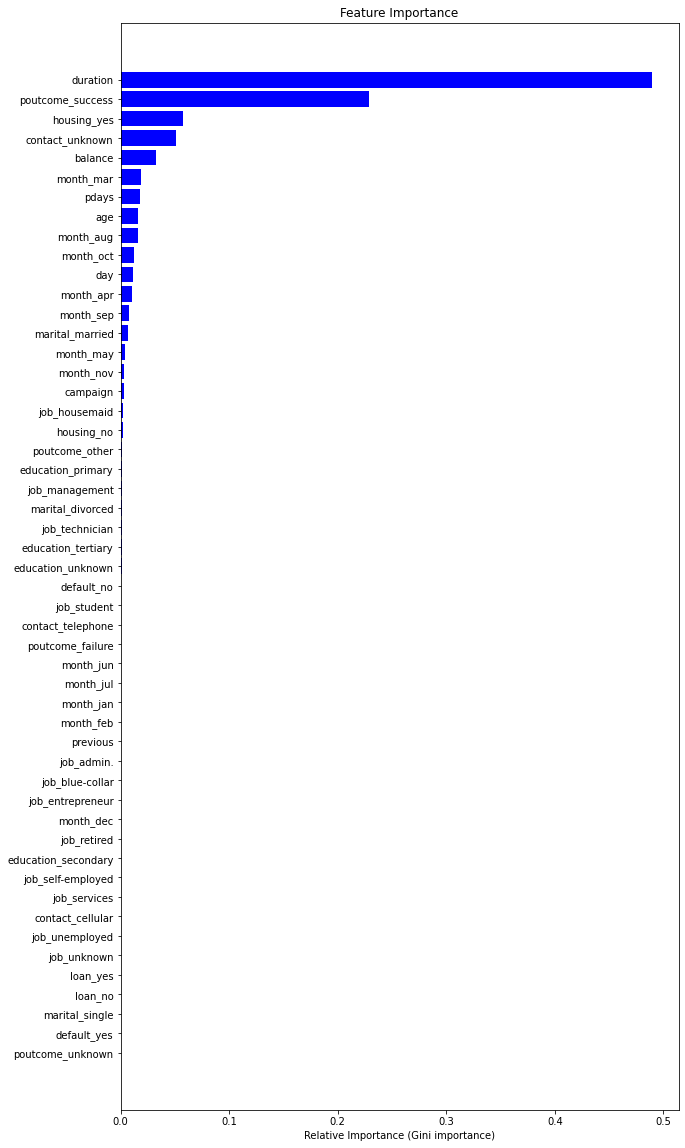

In [ ]:
#important note: we have to adjust the model parameters based on the best balancing method. 

dt=DecisionTreeClassifier(max_depth=RUS_DT_max_depth,random_state=3)# rfgridRUS or rfgridSmote or Urfgrid
dt.fit(rfx_train_rus,rfy_train_rus) # (rfx_train_rus,rfy_train_rus) or (rfx_train_res,rfy_train_res) or (x_train,y_train)

import matplotlib.pyplot as plt
import seaborn as sns

features=dff.loc[:, dff.columns != 'y'].columns
importances=dt.feature_importances_
indices=np.argsort(importances)

f = plt.figure()
f.set_figwidth(10)
f.set_figheight(20)
plt.title("Feature Importance")
plt.barh(range(len(indices)),importances[indices],color="b",align="center",height=.8)
plt.yticks(range(len(indices)),[features[i] for i in indices])
plt.xlabel("Relative Importance (Gini importance)")
plt.show()

In [ ]:
import pandas as pd
df_1=pd.DataFrame({"Feature names":features,"Importances":dt.feature_importances_})
df_1=df_1.sort_values(by="Importances",ascending=False)
df_1

,Feature names,Importances
3,duration,0.489557
49,poutcome_success,0.229189
29,housing_yes,0.057850
34,contact_unknown,0.051323
1,balance,0.032504
42,month_mar,0.019111
5,pdays,0.017468
0,age,0.016224
36,month_aug,0.016205
45,month_oct,0.011945


In [ ]:
#features with importance more than or equal the mean:
df_1[df_1["Importances"]>=df_1["Importances"].mean()]

,Feature names,Importances
3,duration,0.489557
49,poutcome_success,0.229189
29,housing_yes,0.057850
34,contact_unknown,0.051323
1,balance,0.032504


## ***Comparisons***

---

###Before SMOTE vs After SMOTE

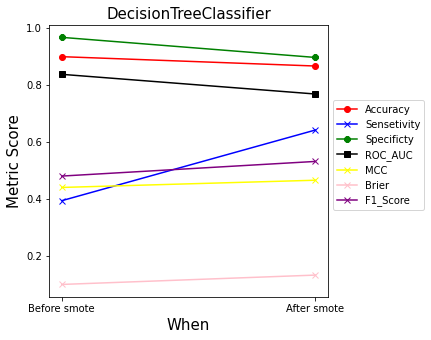

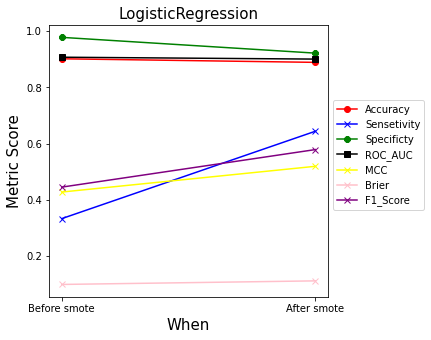

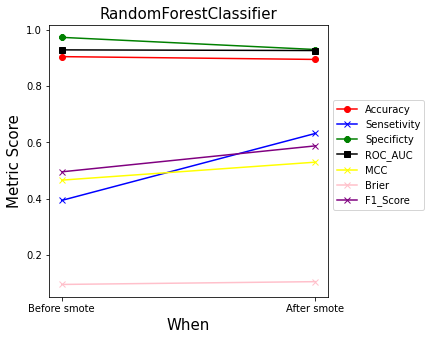

In [ ]:
for x in Smotecomparison.name:
  
  When=["Before smote","After smote"]
  smoteindex=Smotecomparison.loc[Smotecomparison['name'] == x].index.values[0]
  index=comparison.loc[comparison['name'] == x].index.values[0]

  Ac=[comparison.loc[comparison['name'] == x].Accuracy[index],
      Smotecomparison.loc[Smotecomparison['name'] == x].Accuracy[smoteindex]]
  Sen=[comparison.loc[comparison['name'] == x].Sensetivity[index],
       Smotecomparison.loc[Smotecomparison['name'] == x].Sensetivity[smoteindex]]
  SP=[comparison.loc[comparison['name'] == x].Specificity[index],
      Smotecomparison.loc[Smotecomparison['name'] == x].Specificity[smoteindex]]
  ROC_AUC=[comparison.loc[comparison['name'] == x].AUC[index],
           Smotecomparison.loc[Smotecomparison['name'] == x].AUC[smoteindex]]
  MCC2=[comparison.loc[comparison['name'] == x].MCC[index],
           Smotecomparison.loc[Smotecomparison['name'] == x].MCC[smoteindex]]
  Brier=[comparison.loc[comparison['name'] == x].Brier_score[index],
           Smotecomparison.loc[Smotecomparison['name'] == x].Brier_score[smoteindex]]
  F1=[comparison.loc[comparison['name'] == x].F1Score[index],
           Smotecomparison.loc[Smotecomparison['name'] == x].F1Score[smoteindex]]
  

  plt.figure(figsize=(5, 5))
  plt.plot(When, Ac, color='red', marker='o')
  plt.plot(When, Sen, color='blue', marker='x')
  plt.plot(When, SP, color='green', marker='8')
  plt.plot(When, ROC_AUC, color='black', marker='s')
  plt.plot(When, MCC2, color='yellow', marker='x')
  plt.plot(When, Brier, color='pink', marker='x')
  plt.plot(When, F1, color='purple', marker='x')

  plt.title(x, fontsize=15)
  plt.xlabel('When', fontsize=15)
  plt.ylabel('Metric Score', fontsize=15)
  plt.legend(['Accuracy', 'Sensetivity','Specificty','ROC_AUC','MCC',"Brier","F1_Score"], fontsize=10,loc='lower left',bbox_to_anchor =(1, .3))

  plt.show()


###Before RUS vs After RUS

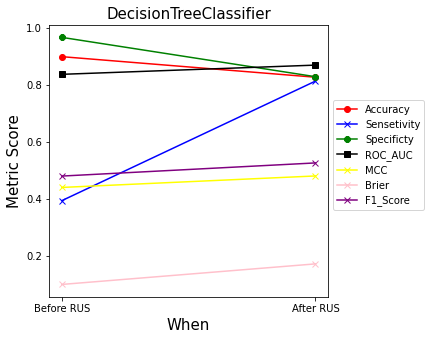

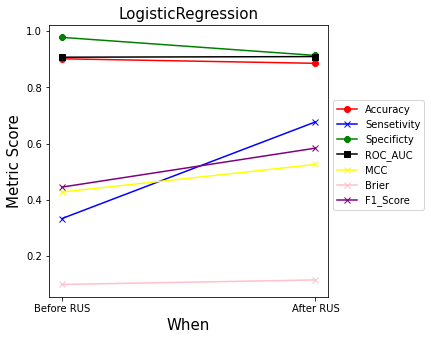

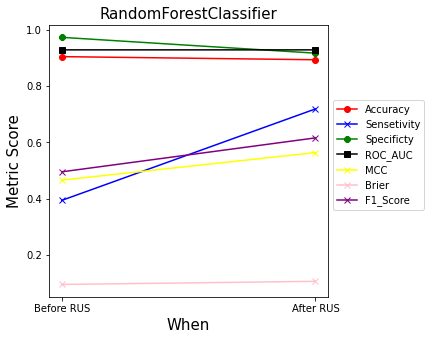

In [ ]:
for x in RUScomparison.name:
  
  When=["Before RUS","After RUS"]
  RUSindex=RUScomparison.loc[RUScomparison['name'] == x].index.values[0]
  index=comparison.loc[comparison['name'] == x].index.values[0]

  Ac=[comparison.loc[comparison['name'] == x].Accuracy[index],
      RUScomparison.loc[RUScomparison['name'] == x].Accuracy[RUSindex]]
  Sen=[comparison.loc[comparison['name'] == x].Sensetivity[index],
       RUScomparison.loc[RUScomparison['name'] == x].Sensetivity[RUSindex]]
  SP=[comparison.loc[comparison['name'] == x].Specificity[index],
      RUScomparison.loc[RUScomparison['name'] == x].Specificity[RUSindex]]
  ROC_AUC=[comparison.loc[comparison['name'] == x].AUC[index],
           RUScomparison.loc[RUScomparison['name'] == x].AUC[RUSindex]]
  MCC2=[comparison.loc[comparison['name'] == x].MCC[index],
           RUScomparison.loc[RUScomparison['name'] == x].Mcc[RUSindex]]
  Brier=[comparison.loc[comparison['name'] == x].Brier_score[index],
           RUScomparison.loc[RUScomparison['name'] == x].brier_score_loss[RUSindex]]
  F1=[comparison.loc[comparison['name'] == x].F1Score[index],
           RUScomparison.loc[RUScomparison['name'] == x].F1Score[RUSindex]]

  plt.figure(figsize=(5, 5))
  plt.plot(When, Ac, color='red', marker='o')
  plt.plot(When, Sen, color='blue', marker='x')
  plt.plot(When, SP, color='green', marker='8')
  plt.plot(When, ROC_AUC, color='black', marker='s')
  plt.plot(When, MCC2, color='yellow', marker='x')
  plt.plot(When, Brier, color='pink', marker='x')
  plt.plot(When, F1, color='purple', marker='x')
 

  plt.title(x, fontsize=15)
  plt.xlabel('When', fontsize=15)
  plt.ylabel('Metric Score', fontsize=15)
  plt.legend(['Accuracy', 'Sensetivity','Specificty','ROC_AUC','MCC',"Brier","F1_Score",], fontsize=10,loc='lower left',bbox_to_anchor =(1, .3))

  plt.show()



###SMOTE VS RUS

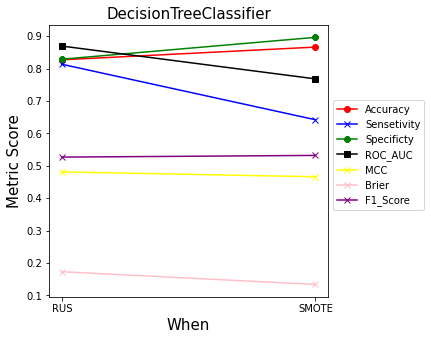

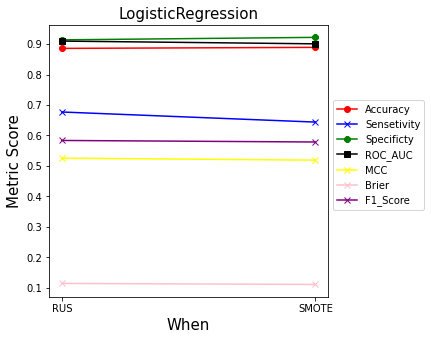

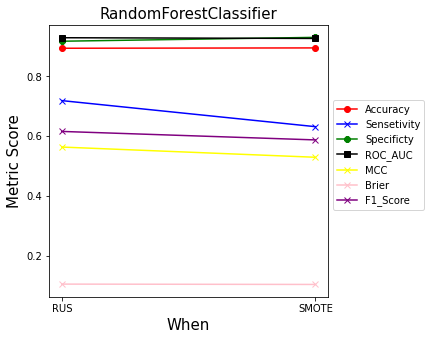

In [ ]:
for x in Smotecomparison.name:
  
  When=["RUS","SMOTE"]
  smoteindex=Smotecomparison.loc[Smotecomparison['name'] == x].index.values[0]
  RUSindex=RUScomparison.loc[RUScomparison['name'] == x].index.values[0]


  Ac=[RUScomparison.loc[RUScomparison['name'] == x].Accuracy[RUSindex],
      Smotecomparison.loc[Smotecomparison['name'] == x].Accuracy[smoteindex]]
  Sen=[RUScomparison.loc[RUScomparison['name'] == x].Sensetivity[RUSindex],
       Smotecomparison.loc[Smotecomparison['name'] == x].Sensetivity[smoteindex]]
  SP=[RUScomparison.loc[RUScomparison['name'] == x].Specificity[RUSindex],
      Smotecomparison.loc[Smotecomparison['name'] == x].Specificity[smoteindex]]
  ROC_AUC=[RUScomparison.loc[RUScomparison['name'] == x].AUC[RUSindex],
           Smotecomparison.loc[Smotecomparison['name'] == x].AUC[smoteindex]]
  MCC2=[RUScomparison.loc[RUScomparison['name'] == x].Mcc[RUSindex],
           Smotecomparison.loc[Smotecomparison['name'] == x].MCC[smoteindex]]
  Brier=[RUScomparison.loc[RUScomparison['name'] == x].brier_score_loss[RUSindex],
           Smotecomparison.loc[Smotecomparison['name'] == x].Brier_score[smoteindex]]
  F1=[RUScomparison.loc[RUScomparison['name'] == x].F1Score[RUSindex],
           Smotecomparison.loc[Smotecomparison['name'] == x].F1Score[smoteindex]]


  plt.figure(figsize=(5, 5))
  plt.plot(When, Ac, color='red', marker='o')
  plt.plot(When, Sen, color='blue', marker='x')
  plt.plot(When, SP, color='green', marker='8')
  plt.plot(When, ROC_AUC, color='black', marker='s')
  plt.plot(When, MCC2, color='yellow', marker='x')
  plt.plot(When, Brier, color='pink', marker='x')
  plt.plot(When, F1, color='purple', marker='x')
 

  plt.title(x, fontsize=15)
  plt.xlabel('When', fontsize=15)
  plt.ylabel('Metric Score', fontsize=15)
  plt.legend(['Accuracy', 'Sensetivity','Specificty','ROC_AUC','MCC',"Brier","F1_Score"], fontsize=10,loc='lower left',bbox_to_anchor =(1, .3))

  plt.show()

###**RUS_Models Comparesions**

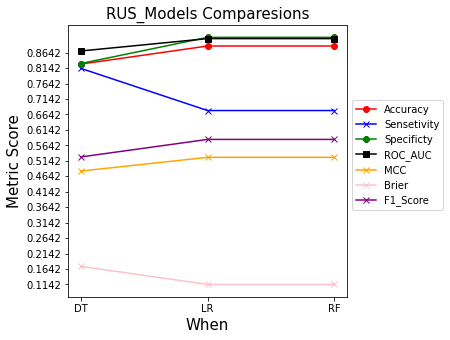

In [ ]:
df_T=RUScomparison.T
df_T

df_T.drop(index=df_T.index[0], 
        axis=0, 
        inplace=True)
df_T=df_T.rename(columns={0: 'DT',1:"LR",2:"RF"})

for x in df_T.index:
  
  When=["DT","LR","RF"]
  DTindex=df_T.loc[df_T.index == x]["DT"][0]
  LRindex=df_T.loc[df_T.index == x]["LR"][0]
  RFindex=df_T.loc[df_T.index == x]["LR"][0]

  if x=="Accuracy":
    Ac=[DTindex,LRindex,RFindex]

  elif x=="Sensetivity":
    Sen=[DTindex,LRindex,RFindex]

  elif x=="Specificity":
    SP=[DTindex,LRindex,RFindex]

  elif x=="AUC":
    ROC_AUC=[DTindex,LRindex,RFindex]

  if x=="Mcc":
    MCC2=[DTindex,LRindex,RFindex]

  if x=="brier_score_loss":
    Brier=[DTindex,LRindex,RFindex]

  if x=="F1Score":
    F1=[DTindex,LRindex,RFindex]


plt.figure(figsize=(5, 5))
plt.plot(When, Ac, color='red', marker='o')
plt.plot(When, Sen, color='blue', marker='x')
plt.plot(When, SP, color='green', marker='8')
plt.plot(When, ROC_AUC, color='black', marker='s')
plt.plot(When, MCC2, color='orange', marker='x')
plt.plot(When, Brier, color='pink', marker='x')
plt.plot(When, F1, color='purple', marker='x')
 
plt.yticks(np.arange(min(Brier), max(Ac), 0.05))
plt.title("RUS_Models Comparesions", fontsize=15)
plt.xlabel('When', fontsize=15)
plt.ylabel('Metric Score', fontsize=15)
plt.legend(['Accuracy', 'Sensetivity','Specificty','ROC_AUC','MCC',"Brier","F1_Score"], fontsize=10,loc='lower left',bbox_to_anchor =(1, .3))

plt.show()



###**SMOTE_Models Comparesions**

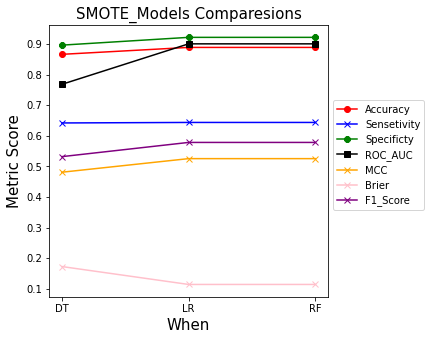

In [ ]:
df_T=Smotecomparison.T
df_T

df_T.drop(index=df_T.index[0], 
        axis=0, 
        inplace=True)
df_T=df_T.rename(columns={0: 'DT',1:"LR",2:"RF"})

for x in df_T.index:
  
  When=["DT","LR","RF"]
  DTindex=df_T.loc[df_T.index == x]["DT"][0]
  LRindex=df_T.loc[df_T.index == x]["LR"][0]
  RFindex=df_T.loc[df_T.index == x]["LR"][0]

  if x=="Accuracy":
    Ac=[DTindex,LRindex,RFindex]

  elif x=="Sensetivity":
    Sen=[DTindex,LRindex,RFindex]

  elif x=="Specificity":
    SP=[DTindex,LRindex,RFindex]

  elif x=="AUC":
    ROC_AUC=[DTindex,LRindex,RFindex]

  if x=="Mcc":
    MCC2=[DTindex,LRindex,RFindex]

  if x=="brier_score_loss":
    Brier=[DTindex,LRindex,RFindex]

  if x=="F1Score":
    F1=[DTindex,LRindex,RFindex]


plt.figure(figsize=(5, 5))
plt.plot(When, Ac, color='red', marker='o')
plt.plot(When, Sen, color='blue', marker='x')
plt.plot(When, SP, color='green', marker='8')
plt.plot(When, ROC_AUC, color='black', marker='s')
plt.plot(When, MCC2, color='orange', marker='x')
plt.plot(When, Brier, color='pink', marker='x')
plt.plot(When, F1, color='purple', marker='x')
 

plt.title("SMOTE_Models Comparesions", fontsize=15)
plt.xlabel('When', fontsize=15)
plt.ylabel('Metric Score', fontsize=15)
plt.legend(['Accuracy', 'Sensetivity','Specificty','ROC_AUC','MCC',"Brier","F1_Score"], fontsize=10,loc='lower left',bbox_to_anchor =(1, .3))

plt.show()

# **Friedman Test to know how these models differ and which one is the best:**

The Friedman Test is a non-parametric alternative to the Repeated Measures ANOVA. It is used to determine whether or not there is a statistically significant difference between three or more groups in which the same subjects show up in each group.

The procedure involves ranking each row (or block) together, then considering the values of ranks by columns. Applicable to complete block designs, it is thus a special case of the Durbin test.

The reason behind choosing Friendman test is that we want to compare multiple classifiers on multiple datasets (as we will apply the k fold cross validation (1n_splits=10, n_repeats=2).

1. We will first create a data frame that has the result of AUC and MCC for each model on each fold.

2. we will apply the Friedman test to know if the modeles performance are statistically different or not .

-Please note that we already concluded that Random undersampling is the best practice to gain better results and we decided that Random Forest will be the best model as its evaluation results were the best and it was stable on many applied scenarios.

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score,accuracy_score,recall_score,brier_score_loss
from sklearn import tree, linear_model,ensemble
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import validation_curve
from sklearn.model_selection import RepeatedKFold
import numpy as np
np.random.seed(3)
import matplotlib.pyplot as plt
plt.style.use("ggplot")

## **Matthews_corrcoef**

In [ ]:
#Matthews_corrcoef 
# prepare the cross-validation procedure
#Due to the assumption that the test statistic has a chi squared distribution, the p-value is only reliable for n > 10 and more than 6 repeated samples.
cv = RepeatedKFold(n_splits=10, n_repeats=2, random_state=111)

RUS_lgr_list_Test_MCC=[]
RUS_RF_list_Test_MCC=[]
RUS_DT_list_Test_MCC=[]

#RUS_lgr_list_training_MCC=[]
#RUS_RF_list_training_MCC=[]
#RUS_DT_list_training_MCC=[]


X=dff.drop(["y"],axis="columns")
y=dff.y
counter=0
for train_index,test_index in cv.split(dff):
  counter+=1
  X_train,X_test=X.iloc[train_index,:],X.iloc[test_index,:]
  Y_train,Y_test=y.iloc[train_index],y.iloc[test_index]
  log_reg=linear_model.LogisticRegression(max_iter=RUS_lgr_max_iter,solver=RUS_lgr_solver,random_state=113,n_jobs=-1)
  DT=tree.DecisionTreeClassifier(max_depth=RUS_DT_max_depth,random_state=113)
  RF=ensemble.RandomForestClassifier(n_estimators=RUS_RF_n_estimators,
                                        max_depth=RUS_RF_max_depth,random_state=113)
  
# Apply the tuned RUS to balance/resample the training set:
#Logistic Regression
  RUSlgr=RandomUnderSampler(sampling_strategy=lgr_RUS_sampling_strategy,random_state=11)
  lgrx_train_rus,lgry_train_rus=RUSlgr.fit_resample(X_train,Y_train)
#Decision Tree
  RUSdt=RandomUnderSampler(sampling_strategy=DT_RUS_sampling_strategy,random_state=11)
  dtx_train_rus,dty_train_rus=RUSdt.fit_resample(X_train,Y_train)
#Random Forest
  RUSrf=RandomUnderSampler(sampling_strategy=RF_RUS_sampling_strategy,random_state=11)
  rfx_train_rus,rfy_train_rus=RUSrf.fit_resample(X_train,Y_train)

#Train the models on the resambles train sets
  log_reg.fit(lgrx_train_rus,lgry_train_rus)#Logistic Regression
  DT.fit(dtx_train_rus,dty_train_rus)#Decision Tree
  RF.fit(rfx_train_rus,rfy_train_rus)#Random Forest

#Predict the test set
  log_reg_y_test_data_pred=log_reg.predict(X_test)
  DT_y_test_data_pred=DT.predict(X_test)
  RF_y_test_data_pred=RF.predict(X_test)

#Calculate MCC for each fold
  RUS_lgr_fold_testing_MCC=matthews_corrcoef(Y_test,log_reg_y_test_data_pred)#logistic Regression 
  RUS_DT_fold_testing_MCC=matthews_corrcoef(Y_test,DT_y_test_data_pred)#Decision Tree
  RUS_RF_fold_testing_MCC=matthews_corrcoef(Y_test,RF_y_test_data_pred)#Random Forest

  RUS_lgr_list_Test_MCC.append(RUS_lgr_fold_testing_MCC)#logistic Regression
  RUS_DT_list_Test_MCC.append(RUS_DT_fold_testing_MCC)#Decision Tree
  RUS_RF_list_Test_MCC.append(RUS_RF_fold_testing_MCC)#Random Forest


In [ ]:
folds=[]
for x in range(counter):
  folds.append(x+1)
Results_MCC= pd.DataFrame({"Fold": folds,"DT":RUS_DT_list_Test_MCC,"LG":RUS_lgr_list_Test_MCC,"RF":RUS_RF_list_Test_MCC})
display(Results_MCC)

,Fold,DT,LG,RF
0,1,0.488996,0.552656,0.590074
1,2,0.462728,0.522442,0.541534
2,3,0.471281,0.517129,0.571813
3,4,0.491908,0.520569,0.560187
4,5,0.462786,0.491912,0.554265
5,6,0.455930,0.532701,0.569286
6,7,0.477755,0.485883,0.564155
7,8,0.502080,0.502493,0.556888
8,9,0.447865,0.526346,0.554213
9,10,0.466944,0.519891,0.540321


In [ ]:
from scipy import stats

#perform Friedman Test
stats.friedmanchisquare(Results_MCC["DT"], Results_MCC["LG"], Results_MCC["RF"])
# The Pvalue is less than 0.05 which means there is a significant difference between the three models

FriedmanchisquareResult(statistic=40.0, pvalue=2.0611536224385566e-09)

In [ ]:
#Interpret the results
#The Friedman Test uses the following null and alternative hypotheses:

#The null hypothesis (H0): There no difference between the models..

#The alternative hypothesis: (Ha): At least one model differs from the rest.

#Since this pvalue=2.0611536224385566e-09 which is less than 0.05, we reject the null hypothesis that tsays all the models are similar to each other.
#This returned a statistical difference, but now I would like to find out between which models the differences exist.

#The are a number of possibilities to perform posthoc-tests (an extension regarding the use of non-parametric tests :
#1  Perform the Nemenyi-test for all pairwise combinations; this is similar to the Tukey-test for ANOVA.
#2. Perform the Bonferroni-Dunn-test; in this setting one compares all values to a list of control values.

### **Perform the Nemenyi Test**
Nemenyi Test: The Friedman Test is used to find whether there exists a significant difference between more than two groups. In such groups, the same subjects show up in each group. If the p-value of the Friedman test turns out to be statistically significant then we can conduct the Nemenyi test to find exactly which groups are different. This test is also known as Nemenyi post-hoc test.

The Friedman Test follows the below hypothesis:

1. The null hypothesis (H0): There no difference between the models.
2. The alternative hypothesis: (Ha): At least one model differs from the rest.


In [ ]:
pip install scikit-posthocs

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# Importing libraries
from scipy import stats
import scikit_posthocs as sp
import numpy as np

In [ ]:
# Conduct the Nemenyi post-hoc test
data = np.array([Results_MCC["DT"], Results_MCC["LG"], Results_MCC["RF"]])
sp.posthoc_nemenyi_friedman(data.T)

,0,1,2
0,1.000000,0.004467,0.001000
1,0.004467,1.000000,0.004467
2,0.001000,0.004467,1.000000


In [ ]:
block=[]
for x in range(len(Results_MCC["Fold"])):
  x+=1
  block.append(x)
FBlock=block+block+block

Results_MCC1=Results_MCC.drop(["Fold"],axis="columns")
longdf=pd.melt(Results_MCC1,var_name="models",value_name="MCC")
longdf["block"]=FBlock
longdf.head()

display(sp.posthoc_nemenyi_friedman(longdf,y_col="MCC",group_col="models",block_col="block",melted=True))

,DT,LG,RF
DT,1.000000,0.004467,0.001000
LG,0.004467,1.000000,0.004467
RF,0.001000,0.004467,1.000000


In [ ]:
#The Nemenyi post-hoc test produces the p-values for each pairwise comparison of means. These values are:

# P-value of Decision Tree MCC  vs. Logistic Regression MCC: 0.004467
# P-value of Decision Tree MCC vs. Random Forest MCC: 0.001000
# P-value of Logistic Regression MCC vs. Random Forest MCC:: 0.004467

# so all of them are different from each other

## **AUROC**

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
# prepare the cross-validation procedure
#Due to the assumption that the test statistic has a chi squared distribution, the p-value is only reliable for n > 10 and more than 6 repeated samples.
cv = RepeatedKFold(n_splits=10, n_repeats=2, random_state=100)

RUS_lgr_list_Test_AUR=[]
RUS_RF_list_Test_AUR=[]
RUS_DT_list_Test_AUR=[]

X=dff.drop(["y"],axis="columns")
y=dff.y
counter=0
for train_index,test_index in cv.split(dff):
  counter+=1
  X_train,X_test=X.iloc[train_index,:],X.iloc[test_index,:]
  Y_train,Y_test=y.iloc[train_index],y.iloc[test_index]

  log_reg=linear_model.LogisticRegression(max_iter=RUS_lgr_max_iter,solver=RUS_lgr_solver,random_state=113,n_jobs=-1)
  DT=tree.DecisionTreeClassifier(max_depth=RUS_DT_max_depth,random_state=113)
  RF=ensemble.RandomForestClassifier(n_estimators=RUS_RF_n_estimators,
                                        max_depth=RUS_RF_max_depth,random_state=113)
  
# Apply the tuned RUS to balance/resample the training set:
#Logistic Regression
  RUSlgr=RandomUnderSampler(sampling_strategy=lgr_RUS_sampling_strategy,random_state=11)
  lgrx_train_rus,lgry_train_rus=RUSlgr.fit_resample(X_train,Y_train)
#Decision Tree
  RUSdt=RandomUnderSampler(sampling_strategy=DT_RUS_sampling_strategy,random_state=11)
  dtx_train_rus,dty_train_rus=RUSdt.fit_resample(X_train,Y_train)
#Random Forest
  RUSrf=RandomUnderSampler(sampling_strategy=RF_RUS_sampling_strategy,random_state=11)
  rfx_train_rus,rfy_train_rus=RUSrf.fit_resample(X_train,Y_train)

#Train the models
  log_reg.fit(lgrx_train_rus,lgry_train_rus)#Logistic Regression
  DT.fit(dtx_train_rus,dty_train_rus)#Decision Tree
  RF.fit(rfx_train_rus,rfy_train_rus)#Random Forest

#Predict the test set
  log_reg_y_test_data_pred=log_reg.predict(X_test)
  DT_y_test_data_pred=DT.predict(X_test)
  RF_y_test_data_pred=RF.predict(X_test)

#to get the probabilities of the prediction for each instance in the test set

  rf_probs= RF.predict_proba(X_test)
  dt_probs= DT.predict_proba(X_test)
  lgr_probs= log_reg.predict_proba(X_test)

#to keep the probabilities of positive outcomes 
  rf_probs=rf_probs[:,1]
  dt_probs=dt_probs[:,1]
  lgr_probs=lgr_probs[:,1]

#Calculate AUR for each fold

  RUS_RF_fold_testing_AUR=roc_auc_score(Y_test,rf_probs)
  RUS_DT_fold_testing_AUR=roc_auc_score(Y_test,dt_probs)
  RUS_lgr_fold_testing_AUR=roc_auc_score(Y_test,lgr_probs)

  RUS_lgr_list_Test_AUR.append(RUS_lgr_fold_testing_AUR)#logistic Regression
  RUS_DT_list_Test_AUR.append(RUS_DT_fold_testing_AUR)#Decision Tree
  RUS_RF_list_Test_AUR.append(RUS_RF_fold_testing_AUR)#Random Forest

In [ ]:
folds=[]
for x in range(counter):
  folds.append(x+1)
Results_AUR = pd.DataFrame({"Fold": folds,"DT":RUS_DT_list_Test_AUR,"LG":RUS_lgr_list_Test_AUR,"RF":RUS_RF_list_Test_AUR})
display(Results_AUR)

,Fold,DT,LG,RF
0,1,0.879790,0.899323,0.929742
1,2,0.878971,0.901120,0.922327
2,3,0.883752,0.910998,0.929956
3,4,0.888113,0.909914,0.932232
4,5,0.889347,0.913651,0.937251
5,6,0.881926,0.906999,0.925350
6,7,0.877982,0.908436,0.933061
7,8,0.883344,0.904250,0.928707
8,9,0.878467,0.905538,0.924177
9,10,0.884521,0.913012,0.936749


In [ ]:
from scipy import stats

#perform Friedman Test
stats.friedmanchisquare(Results_AUR["DT"], Results_AUR["LG"], Results_AUR["RF"])
# The Pvalue is less than 0.05 which means there is a significant difference between the three models

FriedmanchisquareResult(statistic=40.0, pvalue=2.0611536224385566e-09)

### **Nemenyi Test**


In [ ]:
# Conduct the Nemenyi post-hoc test
data = np.array([Results_AUR["DT"], Results_AUR["LG"], Results_AUR["RF"]])
sp.posthoc_nemenyi_friedman(data.T)

,0,1,2
0,1.000000,0.004467,0.001000
1,0.004467,1.000000,0.004467
2,0.001000,0.004467,1.000000


In [ ]:
#The Nemenyi post-hoc test produces the p-values for each pairwise compariso. These values are:

# P-value of Decision Tree MCC  vs. Logistic Regression MCC: 0.004467
# P-value of Decision Tree MCC vs. Random Forest MCC: 0.001000
# P-value of Logistic Regression MCC vs. Random Forest MCC:: 0.004467

# So all of them are different from each other

# **Export the report**

In [ ]:
#convert it to pdf
!sudo apt-get install texlive-xetex texlive-fonts-recommended texlive-plain-generic

In [ ]:
!jupyter nbconvert --to pdf /content/Final_Project_Code.ipynb

[NbConvertApp] Converting notebook /content/Final_Project_Code.ipynb to pdf
/usr/local/lib/python3.8/dist-packages/nbconvert/filters/datatypefilter.py:39: UserWarning: Your element with mimetype(s) dict_keys(['text/html']) is not able to be represented.
  warn("Your element with mimetype(s) {mimetypes}"
/usr/local/lib/python3.8/dist-packages/nbconvert/filters/datatypefilter.py:39: UserWarning: Your element with mimetype(s) dict_keys(['text/html']) is not able to be represented.
  warn("Your element with mimetype(s) {mimetypes}"
/usr/local/lib/python3.8/dist-packages/nbconvert/filters/datatypefilter.py:39: UserWarning: Your element with mimetype(s) dict_keys(['text/html']) is not able to be represented.
  warn("Your element with mimetype(s) {mimetypes}"
[NbConvertApp] Support files will be in Final_Project_Code_files/
[NbConvertApp] Making directory ./Final_Project_Code_files
[NbConvertApp] Making directory ./Final_Project_Code_files
[NbConvertApp] Making directory ./Final_Project_Code_